# Problem Statement:
### A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
### Approach - A decision tree and Random Forest can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
company = pd.read_csv("Company_Data.csv")

In [3]:
company.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

# Checking mininmum value of sales using mean

(array([ 6., 16., 47., 83., 89., 79., 40., 29.,  8.,  3.]),
 array([ 0.   ,  1.627,  3.254,  4.881,  6.508,  8.135,  9.762, 11.389,
        13.016, 14.643, 16.27 ]),
 <BarContainer object of 10 artists>)

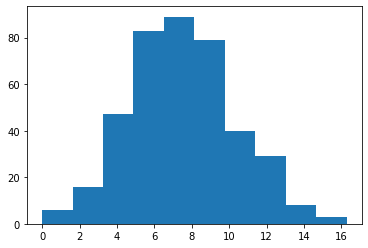

In [4]:
plt.hist('Sales',data=company)

In [5]:
company.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [6]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
company.shape

(400, 11)

In [8]:
company.duplicated().sum()

0

In [9]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

## Converting Sales into categorical column

In [10]:
df1=pd.Series(company['Sales'])
s=[]
for i in df1:
    if i>7.5:
        s.append('Good')
    
    else:
        s.append('Bad')

print(s)
            

['Good', 'Good', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Bad', 'Good', 'Bad', 'Bad', 'Good', 'Good', 'Good', 'Bad', 'Bad', 'Good', 'Good', 'Good', 'Bad', 'Good', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Good', 'Good', 'Good', 'Good', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Good', 'Good', 'Bad', 'Good', 'Good', 'Good', 'Good', 'Bad', 'Bad', 'Good', 'Good', 'Good', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Good', 'Bad', 'Good', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Good', 'Bad', 'Good', 'Good', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 'Good', 'Good', 'Good', 'Bad', 'Bad', 'Bad', 'Good', 'Bad', 'Good', 

# Adding sale categorical column into dataset

In [11]:
df2=pd.DataFrame(s)
company_new=pd.concat([df2,company],axis=1)
company_new=company_new.rename({0:'sales'},axis=1)
company_new

sales  Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  \
0    Good   9.50        138      73           11         276    120       Bad   
1    Good  11.22        111      48           16         260     83      Good   
2    Good  10.06        113      35           10         269     80    Medium   
3     Bad   7.40        117     100            4         466     97    Medium   
4     Bad   4.15        141      64            3         340    128       Bad   
..    ...    ...        ...     ...          ...         ...    ...       ...   
395  Good  12.57        138     108           17         203    128      Good   
396   Bad   6.14        139      23            3          37    120    Medium   
397   Bad   7.41        162      26           12         368    159    Medium   
398   Bad   5.94        100      79            7         284     95       Bad   
399  Good   9.71        134      37            0          27    120      Good   

     Age  Education Urban   US  
0     42         17   Yes  Yes  
1     65         10   Yes  Yes  
2     59         12   Yes  Yes  
3     55         14   Yes  Yes  
4     38         13   Yes   No  
..   ...        ...   ...  ...  
395   33         14   Yes  Yes  
396   55         11    No  Yes  
397   40         18   Yes  Yes  
398   50         12   Yes  Yes  
399   49         16   Yes  Yes  

[400 rows x 12 columns]

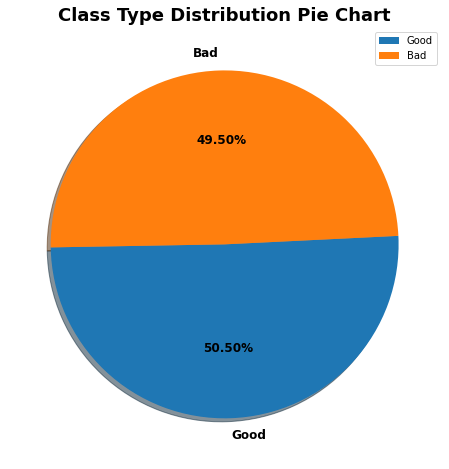

In [12]:
plt.figure(figsize = (12,8))
plt.pie(company_new['sales'].value_counts(),
       labels=company_new.sales.unique(),
       autopct= '%.2f%%',
       shadow= True,
       startangle= 181,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

Text(0.5, 1.0, 'Bad or Good for Sales')

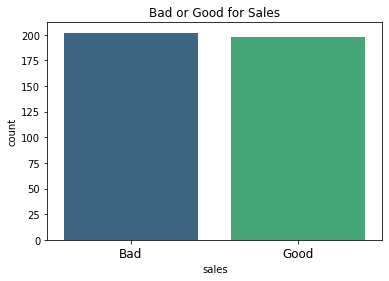

In [13]:
sns.countplot(x='sales', data=company_new, palette = 'viridis', 
              order=company_new['sales'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Bad or Good for Sales')

Text(0.5, 1.0, 'Correlation with Sales \n')

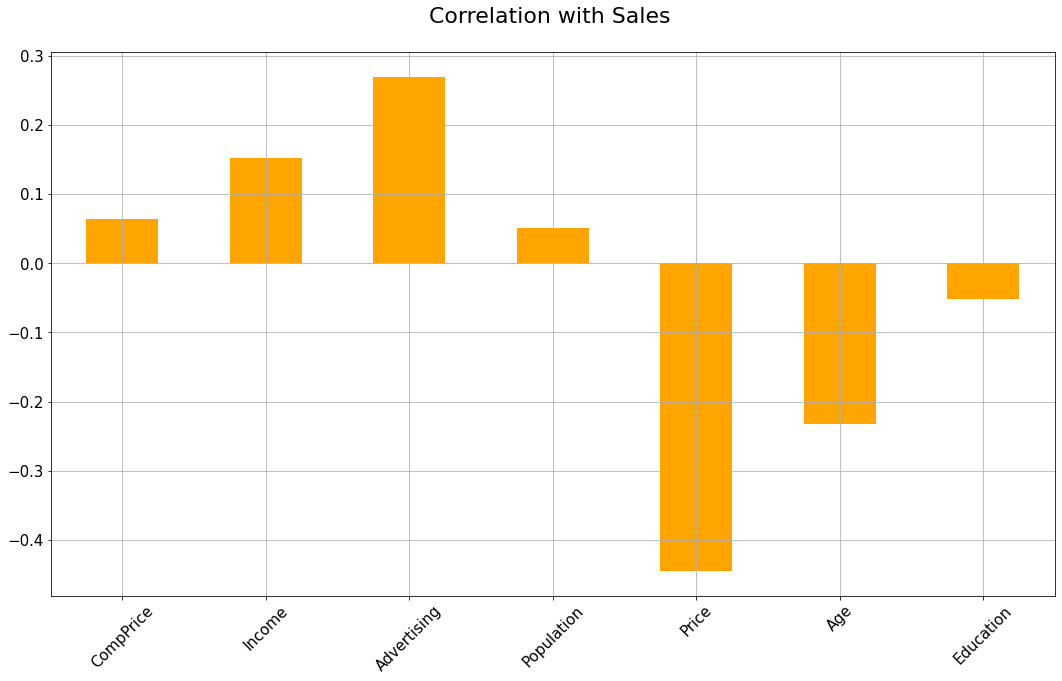

In [14]:
data = company_new.copy()

correlations = data.corrwith(company.Sales)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'orange',
        rot = 45, grid = True)
plt.title('Correlation with Sales \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

# Droping Sales numeric column

In [15]:
company_new.drop('Sales',axis=1,inplace=True)

In [16]:
company_new

sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0    Good        138      73           11         276    120       Bad   42   
1    Good        111      48           16         260     83      Good   65   
2    Good        113      35           10         269     80    Medium   59   
3     Bad        117     100            4         466     97    Medium   55   
4     Bad        141      64            3         340    128       Bad   38   
..    ...        ...     ...          ...         ...    ...       ...  ...   
395  Good        138     108           17         203    128      Good   33   
396   Bad        139      23            3          37    120    Medium   55   
397   Bad        162      26           12         368    159    Medium   40   
398   Bad        100      79            7         284     95       Bad   50   
399  Good        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

# Barplot for obsevation of Data

<AxesSubplot:xlabel='sales', ylabel='CompPrice'>

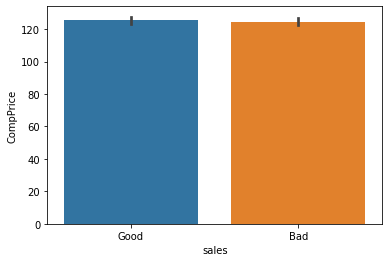

In [17]:
sns.barplot("sales",'CompPrice',data=company_new)

## Observation:
As we can see that price charge by competitor at each location having equal amount of good and bad sales

<AxesSubplot:xlabel='sales', ylabel='Income'>

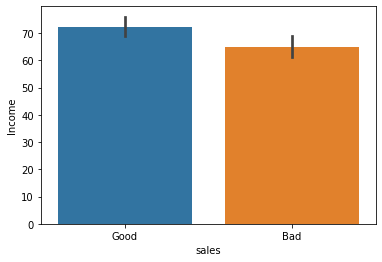

In [18]:
sns.barplot('sales','Income',data=company_new)

## Observation:
As we can see in this graph of income is that if the income increases then the sales will also incrases

<AxesSubplot:xlabel='sales', ylabel='Advertising'>

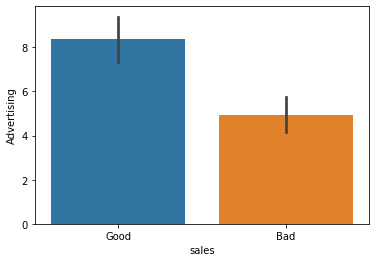

In [19]:
sns.barplot('sales',"Advertising",data=company_new)

## Observation:
As we can see in this graph of Advertising if the advistising of the product increase the sales will also increases

<AxesSubplot:xlabel='sales', ylabel='Population'>

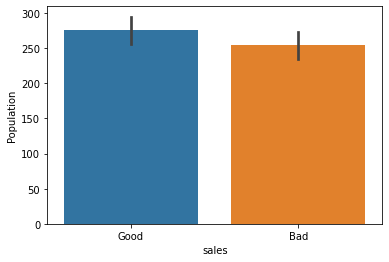

In [20]:
sns.barplot("sales",'Population',data=company_new)

## Observation:
As we can see that the population of the location is high the sales will also get increases

<AxesSubplot:xlabel='sales', ylabel='Price'>

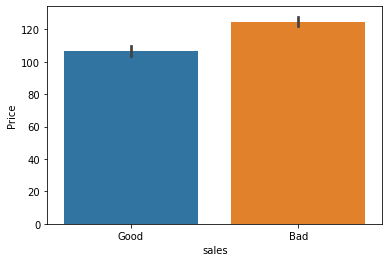

In [21]:
sns.barplot('sales','Price',data=company_new)

## Obsrvation:
As we can see that if the prices gets increases the sales will also get affected and it will get decreased

<AxesSubplot:xlabel='sales', ylabel='Age'>

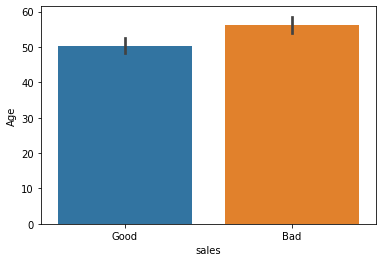

In [22]:
sns.barplot("sales",'Age',data=company_new)

## Observation:
As we can see that after age of 50 the sales of the product get decreases

<AxesSubplot:xlabel='sales', ylabel='Education'>

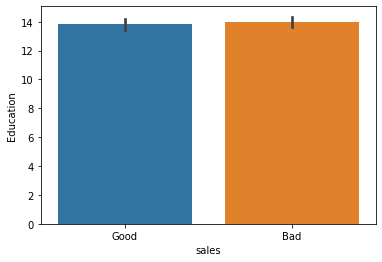

In [23]:
sns.barplot('sales','Education',data=company_new)

## Observation:
As we can if the Education increases then we can there is an slightly having bad sales

# Pairplot

<Figure size 3750x2500 with 0 Axes>

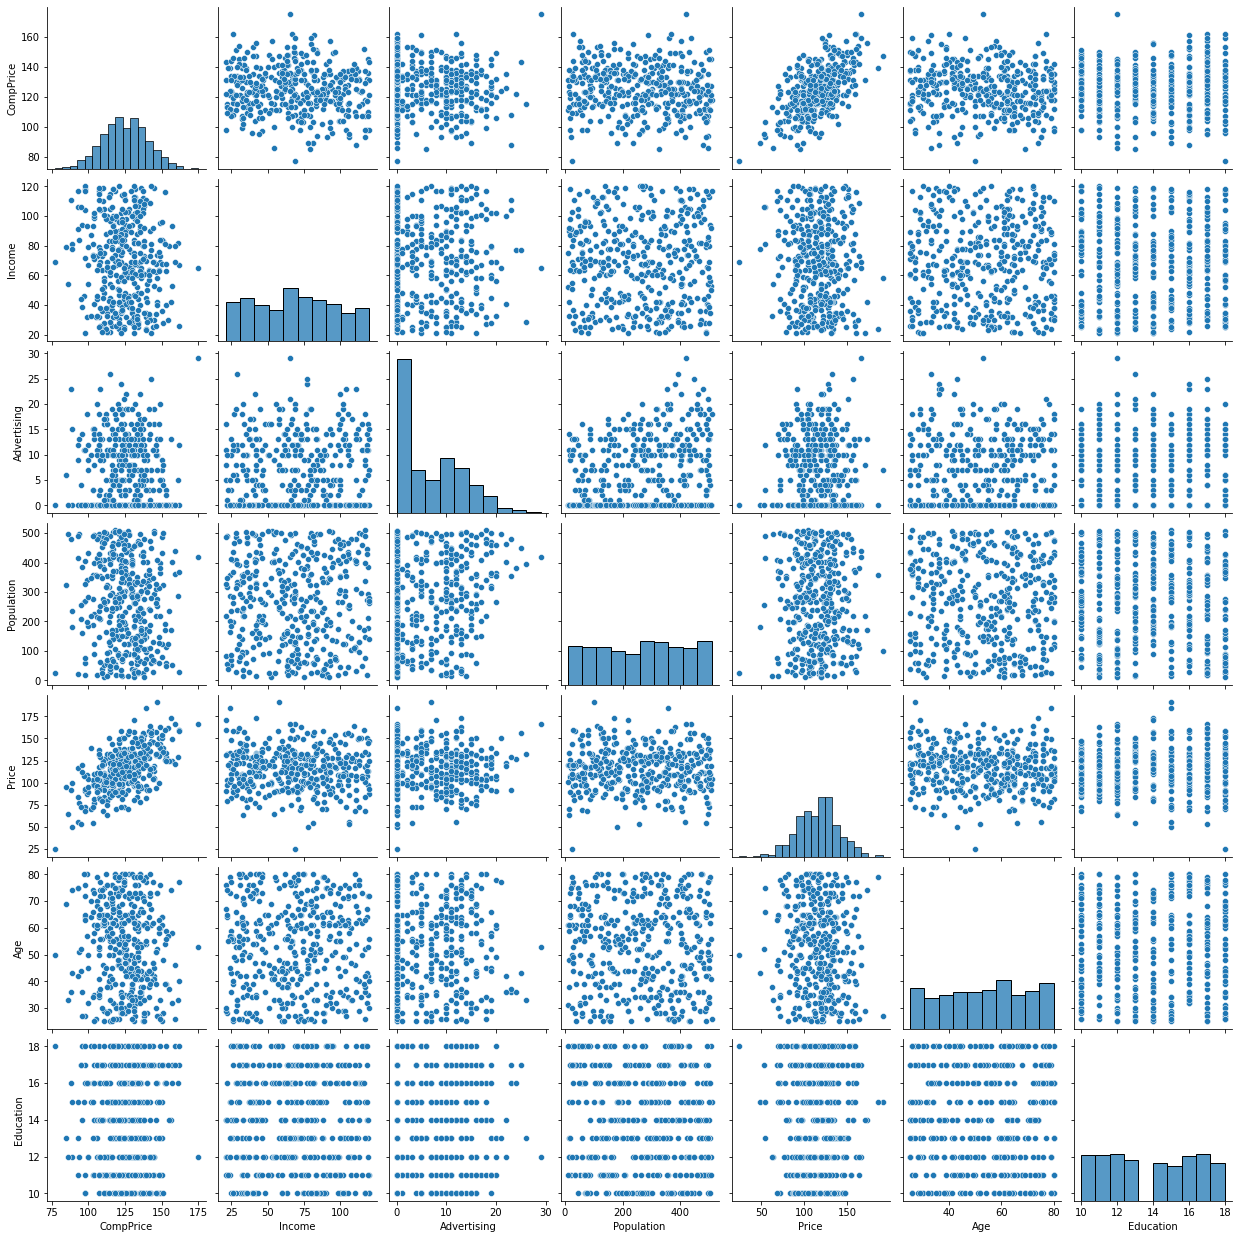

In [24]:
plt.figure(figsize=(15,10),dpi=250)
sns.pairplot(company_new)

# Converting Categorical value into Numeric value

In [25]:
company_new['sales'].unique()

array(['Good', 'Bad'], dtype=object)

In [26]:
company_new["sales"]=company_new["sales"].map({'Good':1,'Bad':0})

In [27]:
company_new

sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0        1        138      73           11         276    120       Bad   42   
1        1        111      48           16         260     83      Good   65   
2        1        113      35           10         269     80    Medium   59   
3        0        117     100            4         466     97    Medium   55   
4        0        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395      1        138     108           17         203    128      Good   33   
396      0        139      23            3          37    120    Medium   55   
397      0        162      26           12         368    159    Medium   40   
398      0        100      79            7         284     95       Bad   50   
399      1        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [28]:
company_new["ShelveLoc"].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [29]:
company_new["ShelveLoc"]=company_new["ShelveLoc"].map({"Bad":0,"Medium":1,"Good":2})

In [30]:
company_new

sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0        1        138      73           11         276    120          0   42   
1        1        111      48           16         260     83          2   65   
2        1        113      35           10         269     80          1   59   
3        0        117     100            4         466     97          1   55   
4        0        141      64            3         340    128          0   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395      1        138     108           17         203    128          2   33   
396      0        139      23            3          37    120          1   55   
397      0        162      26           12         368    159          1   40   
398      0        100      79            7         284     95          0   50   
399      1        134      37            0          27    120          2   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [31]:
company_new['Urban'].unique()

array(['Yes', 'No'], dtype=object)

In [32]:
company_new['Urban']=company_new["Urban"].map({'No':0,"Yes":1})

In [33]:
company_new

sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0        1        138      73           11         276    120          0   42   
1        1        111      48           16         260     83          2   65   
2        1        113      35           10         269     80          1   59   
3        0        117     100            4         466     97          1   55   
4        0        141      64            3         340    128          0   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395      1        138     108           17         203    128          2   33   
396      0        139      23            3          37    120          1   55   
397      0        162      26           12         368    159          1   40   
398      0        100      79            7         284     95          0   50   
399      1        134      37            0          27    120          2   49   

     Education  Urban   US  
0           17      1  Yes  
1           10      1  Yes  
2           12      1  Yes  
3           14      1  Yes  
4           13      1   No  
..         ...    ...  ...  
395         14      1  Yes  
396         11      0  Yes  
397         18      1  Yes  
398         12      1  Yes  
399         16      1  Yes  

[400 rows x 11 columns]

In [34]:
company_new["US"].unique()

array(['Yes', 'No'], dtype=object)

In [35]:
company_new["US"]=company_new["US"].map({"Yes":1,"No":0})

In [36]:
company_new

sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0        1        138      73           11         276    120          0   42   
1        1        111      48           16         260     83          2   65   
2        1        113      35           10         269     80          1   59   
3        0        117     100            4         466     97          1   55   
4        0        141      64            3         340    128          0   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395      1        138     108           17         203    128          2   33   
396      0        139      23            3          37    120          1   55   
397      0        162      26           12         368    159          1   40   
398      0        100      79            7         284     95          0   50   
399      1        134      37            0          27    120          2   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  
3           14      1   1  
4           13      1   0  
..         ...    ...  ..  
395         14      1   1  
396         11      0   1  
397         18      1   1  
398         12      1   1  
399         16      1   1  

[400 rows x 11 columns]

# Histogram

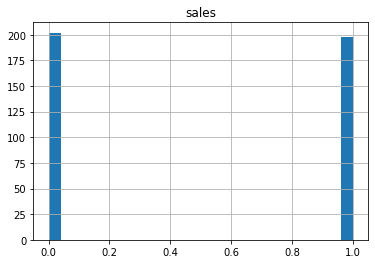

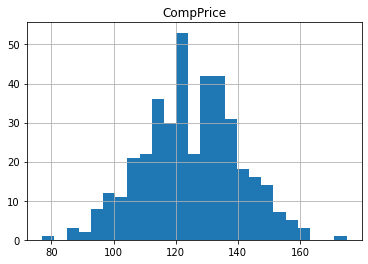

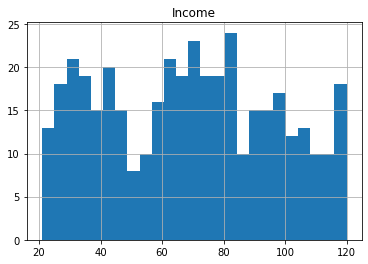

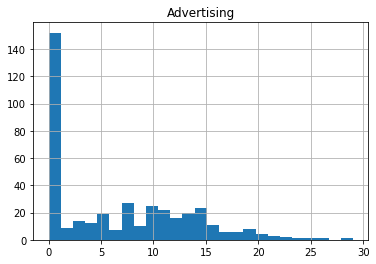

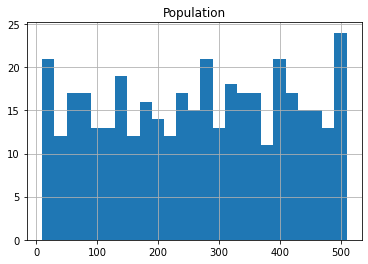

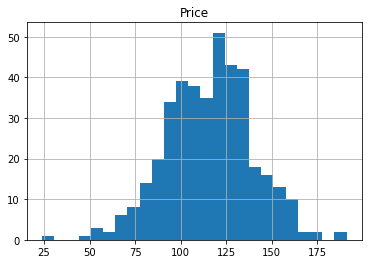

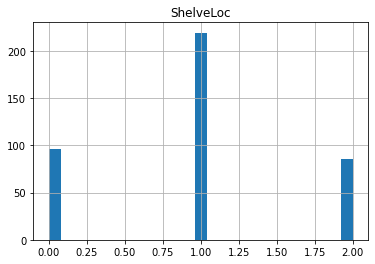

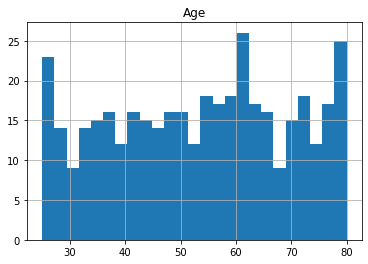

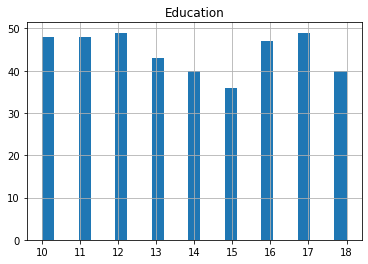

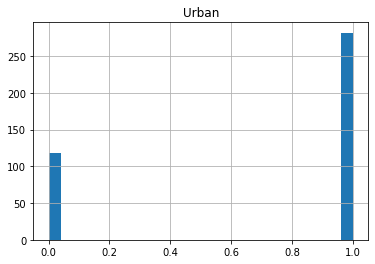

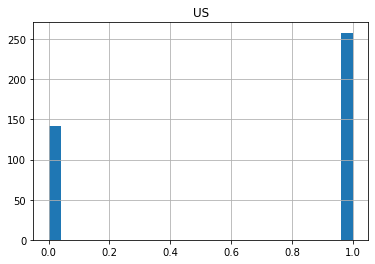

In [37]:
for feature in company_new:
    data = company_new.copy()
    data[feature].hist(bins=25)
    plt.title(feature)
    plt.show()

# Boxplot to see the outliers in the data

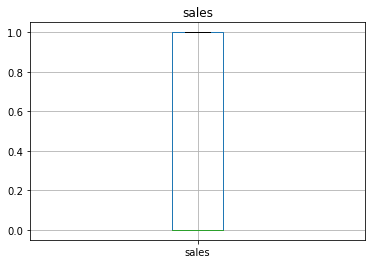

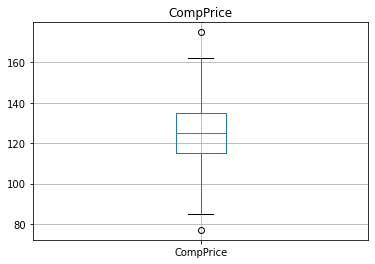

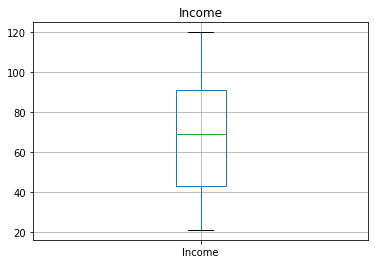

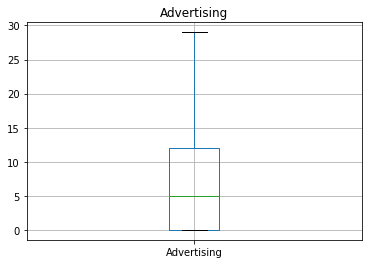

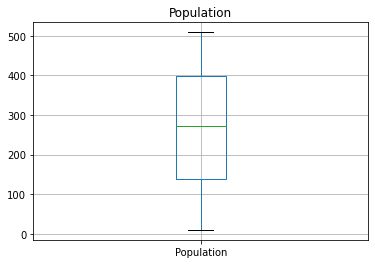

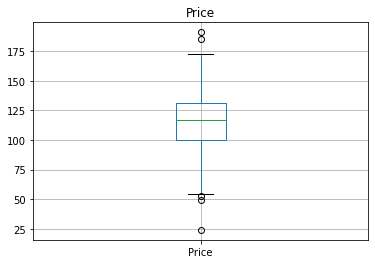

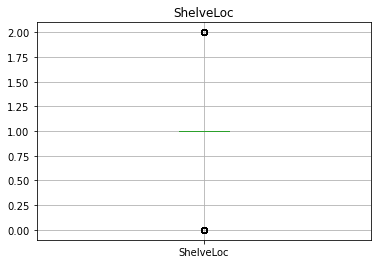

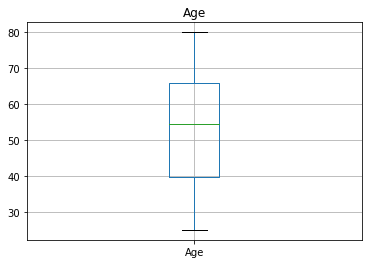

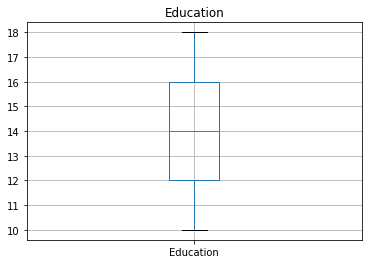

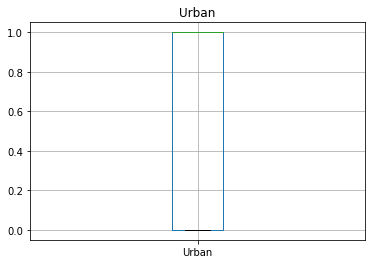

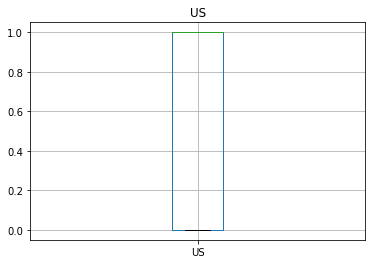

In [38]:
for feature in company_new:
    data = company_new.copy()
    data.boxplot(column=feature)
    plt.title(feature)
    plt.show()

# Observation:
As we can see that the compPrice,shelveLoc and price are having some outliers

# Heatmap to see correlation 

<AxesSubplot:>

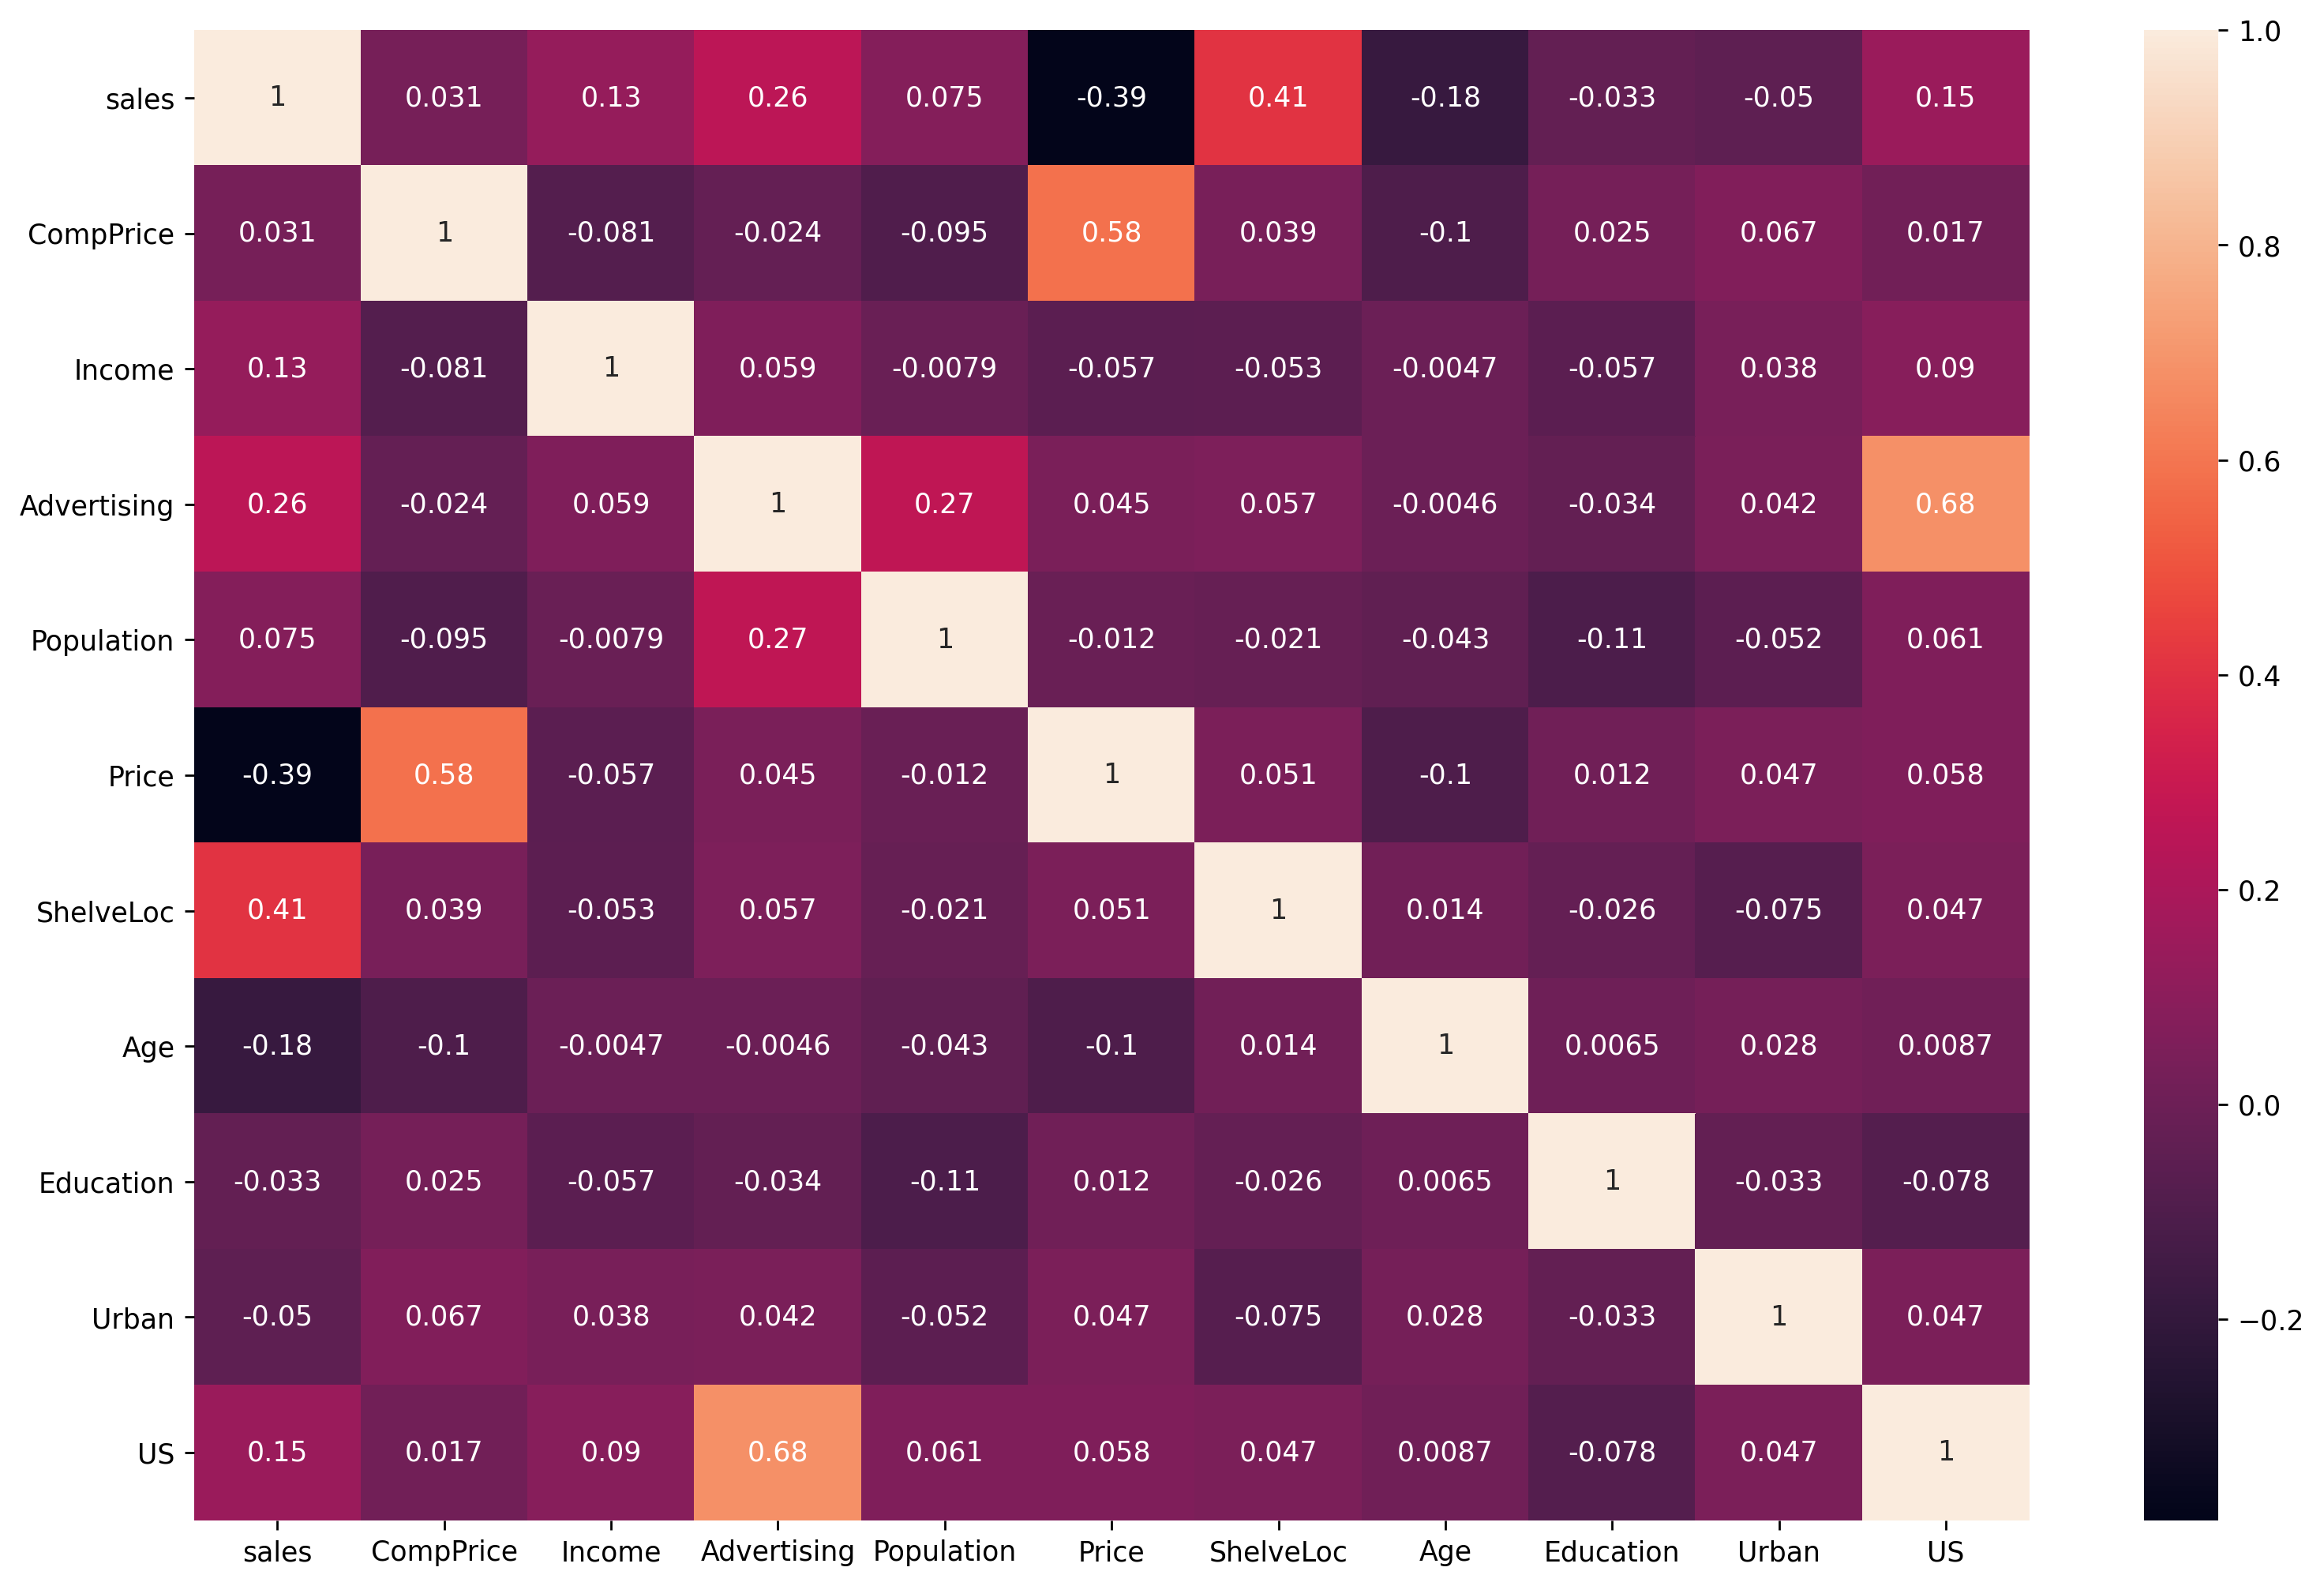

In [39]:
plt.figure(figsize=(15,10),dpi=250)
sns.heatmap(data=company_new.corr(),annot=True)

## Observation:
As we can see that the Advertising and US are higly correlated i.e 68%

# Importing SKLearn Models

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,StratifiedKFold,cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import preprocessing
from sklearn import metrics

In [41]:
skf = StratifiedKFold()

# Spliting Data into X and Y 

In [42]:
X = company_new.iloc[:,1:]
Y = company_new[["sales"]]

In [43]:
X

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          2   65   
2          113      35           10         269     80          1   59   
3          117     100            4         466     97          1   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          2   33   
396        139      23            3          37    120          1   55   
397        162      26           12         368    159          1   40   
398        100      79            7         284     95          0   50   
399        134      37            0          27    120          2   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  
3           14      1   1  
4           13      1   0  
..         ...    ...  ..  
395         14      1   1  
396         11      0   1  
397         18      1   1  
398         12      1   1  
399         16      1   1  

[400 rows x 10 columns]

In [44]:
Y

sales
0        1
1        1
2        1
3        0
4        0
..     ...
395      1
396      0
397      0
398      0
399      1

[400 rows x 1 columns]

In [45]:
company_new["sales"].value_counts()

0    202
1    198
Name: sales, dtype: int64

# Spliting the data into Train and Test

In [46]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=45)

In [47]:
X_train

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
133        132      98            2         265     97          0   62   
226        119      33            0         245    122          2   56   
250        137     105           10         435    156          2   72   
177        138      72            0         148     94          1   27   
149        121     120           13         140     87          1   56   
..         ...     ...          ...         ...    ...        ...  ...   
213        149      84            5         220    139          1   33   
95         134      25           10         237    148          1   59   
32         107      32           12         236    137          2   64   
380        106      64           10          17     89          1   68   
131        108      69            3         208     94          1   77   

     Education  Urban  US  
133         12      1   1  
226         14      1   0  
250         14      1   1  
177         17      1   1  
149         11      1   1  
..         ...    ...  ..  
213         10      1   1  
95          13      1   1  
32          10      0   1  
380         17      1   1  
131         16      1   0  

[320 rows x 10 columns]

In [48]:
X_test

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
255        123      81            8         198     81          0   80   
346        132     107            0         144    125          1   33   
228        149      73           13         381    163          0   26   
384        123      37           15         348    112          2   28   
269        159      69            0         438    166          1   46   
..         ...     ...          ...         ...    ...        ...  ...   
320        136      70           12         171    152          1   44   
73         118      90           10          54    104          2   31   
79         134      67            0         286     90          0   41   
390        108      75            9          61    111          1   67   
204        155      80            0         237    124          1   37   

     Education  Urban  US  
255         15      1   1  
346         13      0   0  
228         11      0   1  
384         12      1   1  
269         17      1   0  
..         ...    ...  ..  
320         18      1   1  
73          11      0   1  
79          13      1   0  
390         12      1   1  
204         14      1   0  

[80 rows x 10 columns]

In [49]:
Y_train

sales
133      1
226      1
250      1
177      1
149      1
..     ...
213      1
95       0
32       0
380      1
131      0

[320 rows x 1 columns]

In [50]:
Y_test

sales
255      1
346      1
228      0
384      1
269      0
..     ...
320      0
73       1
79       1
390      0
204      1

[80 rows x 1 columns]

In [51]:
skf= StratifiedKFold(n_splits=5)

# Creating Decision Tree Model

## Desicion Tree using pre-punning and method=gini

In [52]:
model = DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_split=5)
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=5)

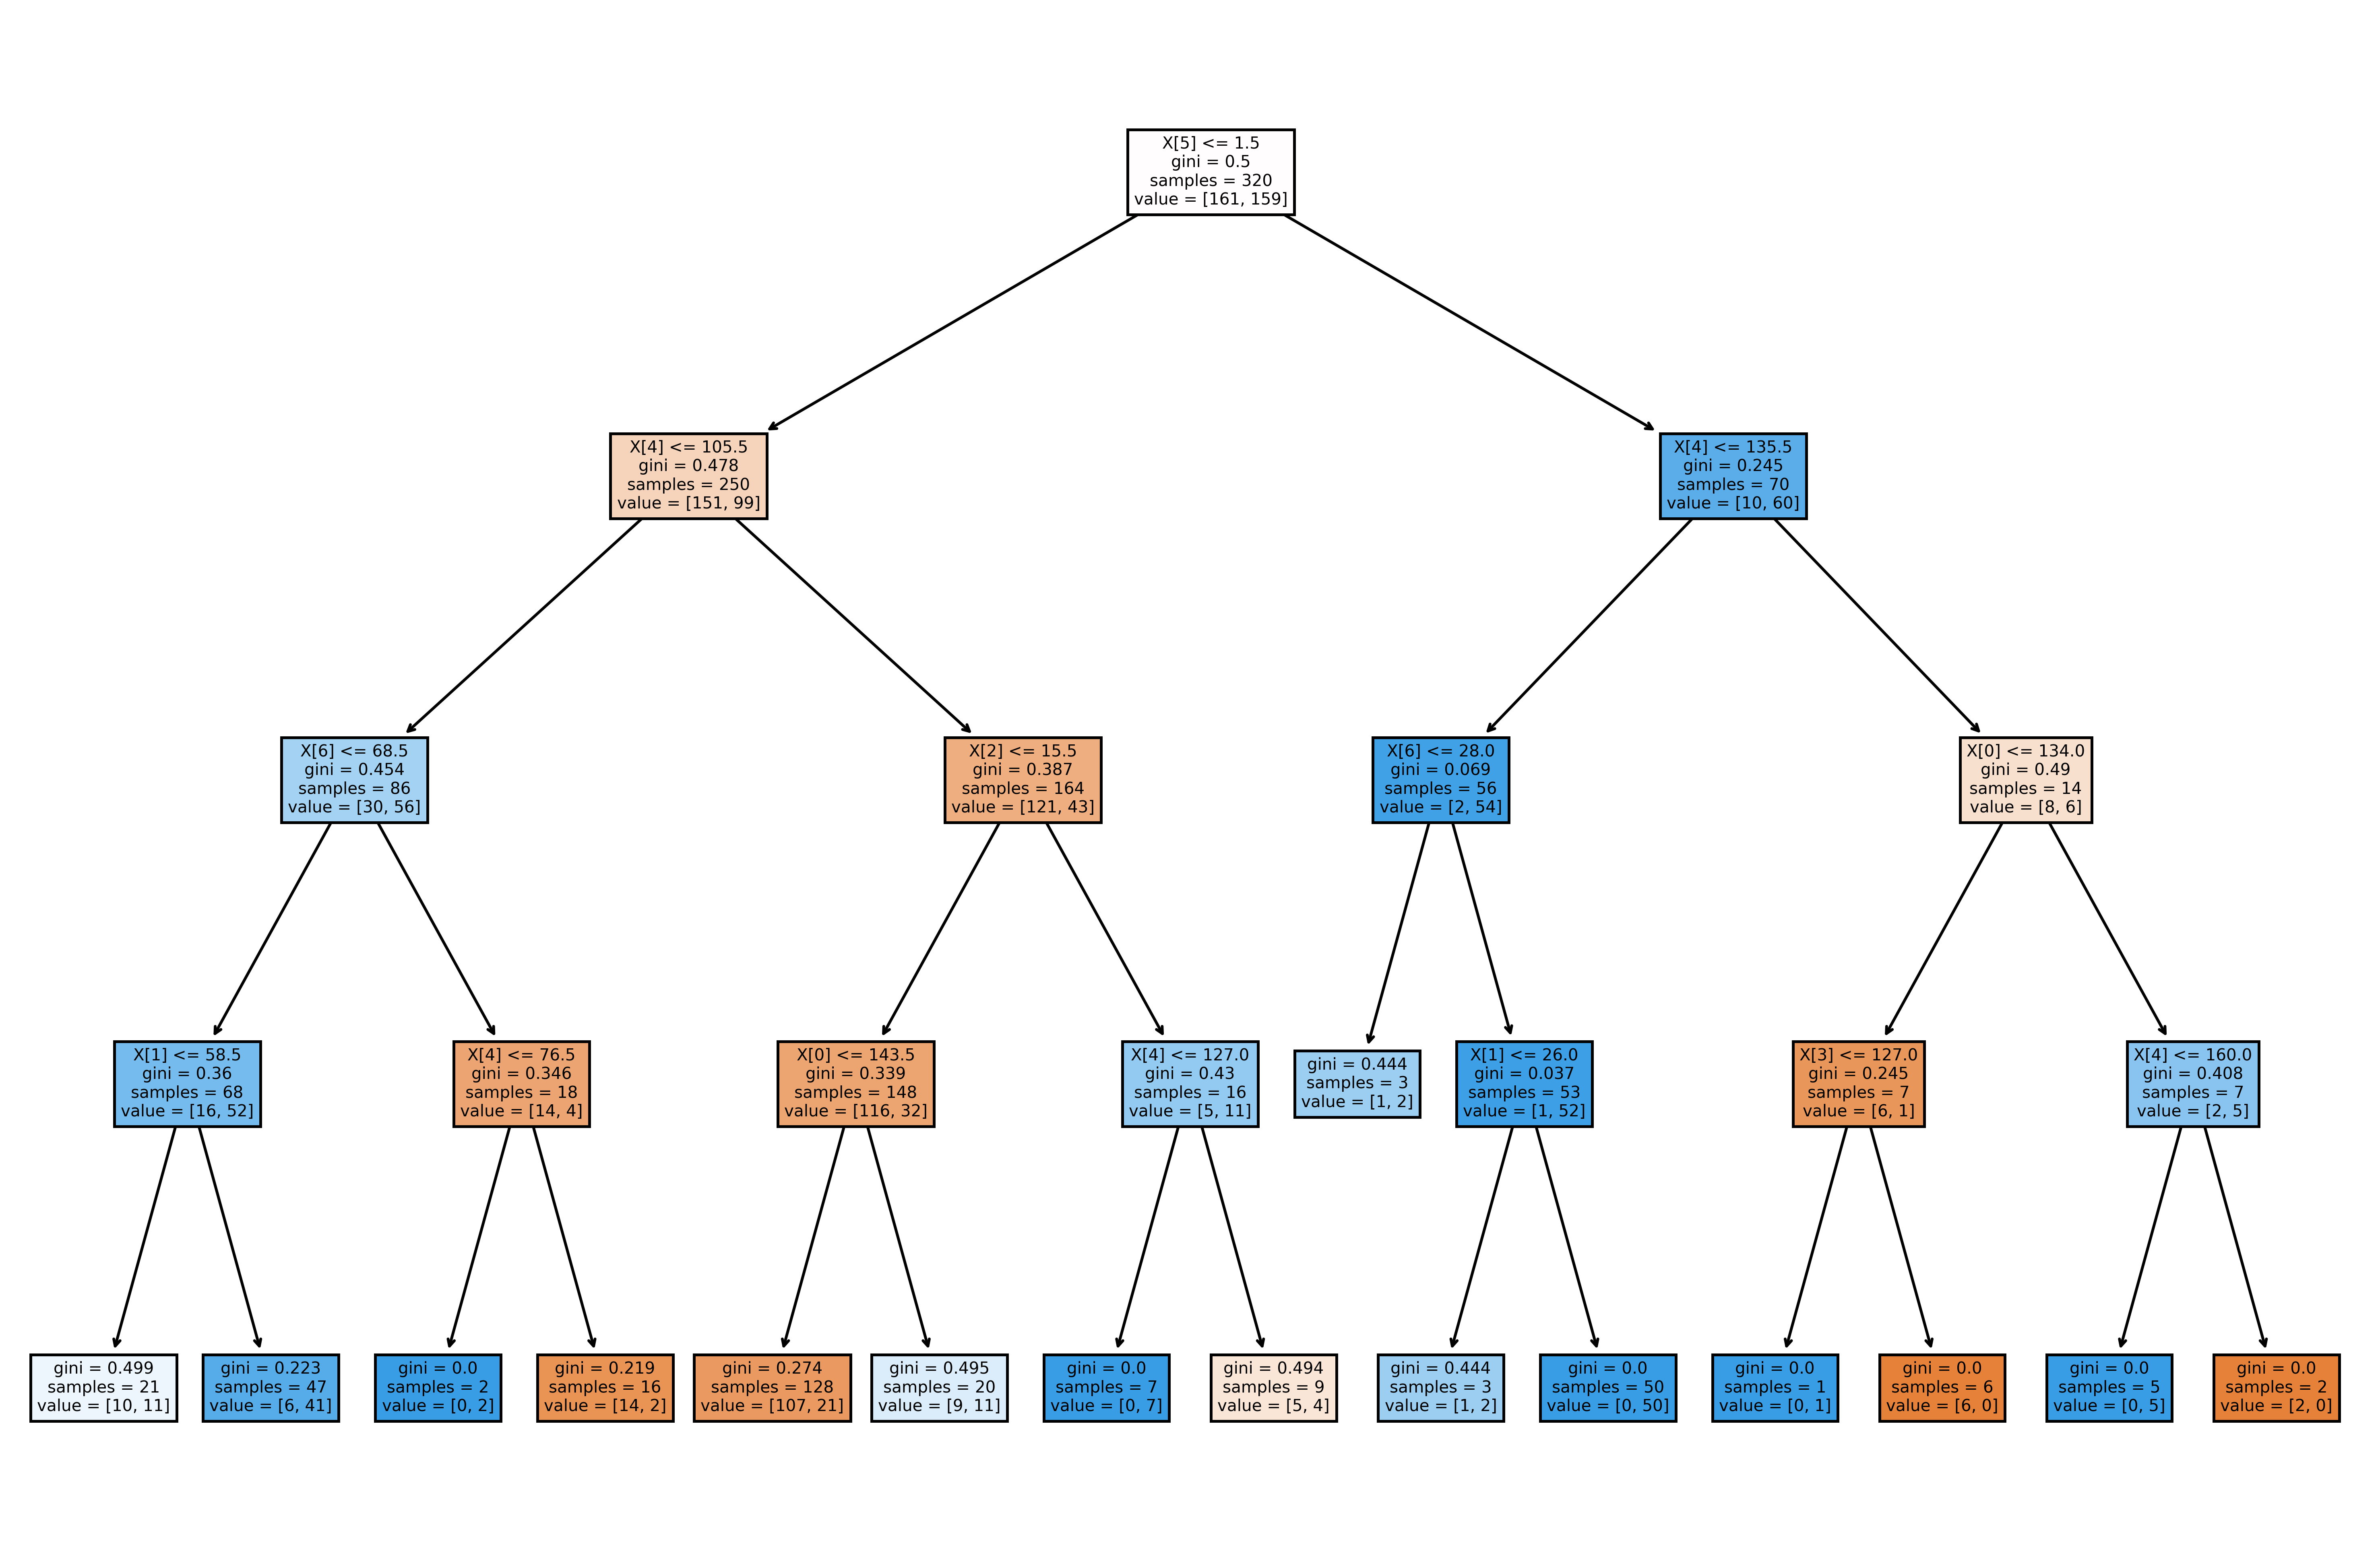

In [53]:
plt.figure(figsize=(15,10),dpi=500)
tree.plot_tree(model,filled=True);

In [54]:
preds=model.predict(X_test)
pd.Series(preds).value_counts()

1    42
0    38
dtype: int64

In [55]:
metrics.accuracy_score(Y_test,preds)

0.6625

In [56]:
print(classification_report(Y_test,preds))

              precision    recall  f1-score   support

           0       0.68      0.63      0.66        41
           1       0.64      0.69      0.67        39

    accuracy                           0.66        80
   macro avg       0.66      0.66      0.66        80
weighted avg       0.66      0.66      0.66        80



## Decision Tree using post puning and method=gini

In [57]:
model2 = DecisionTreeClassifier(criterion='gini',random_state=0)
model2.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=0)

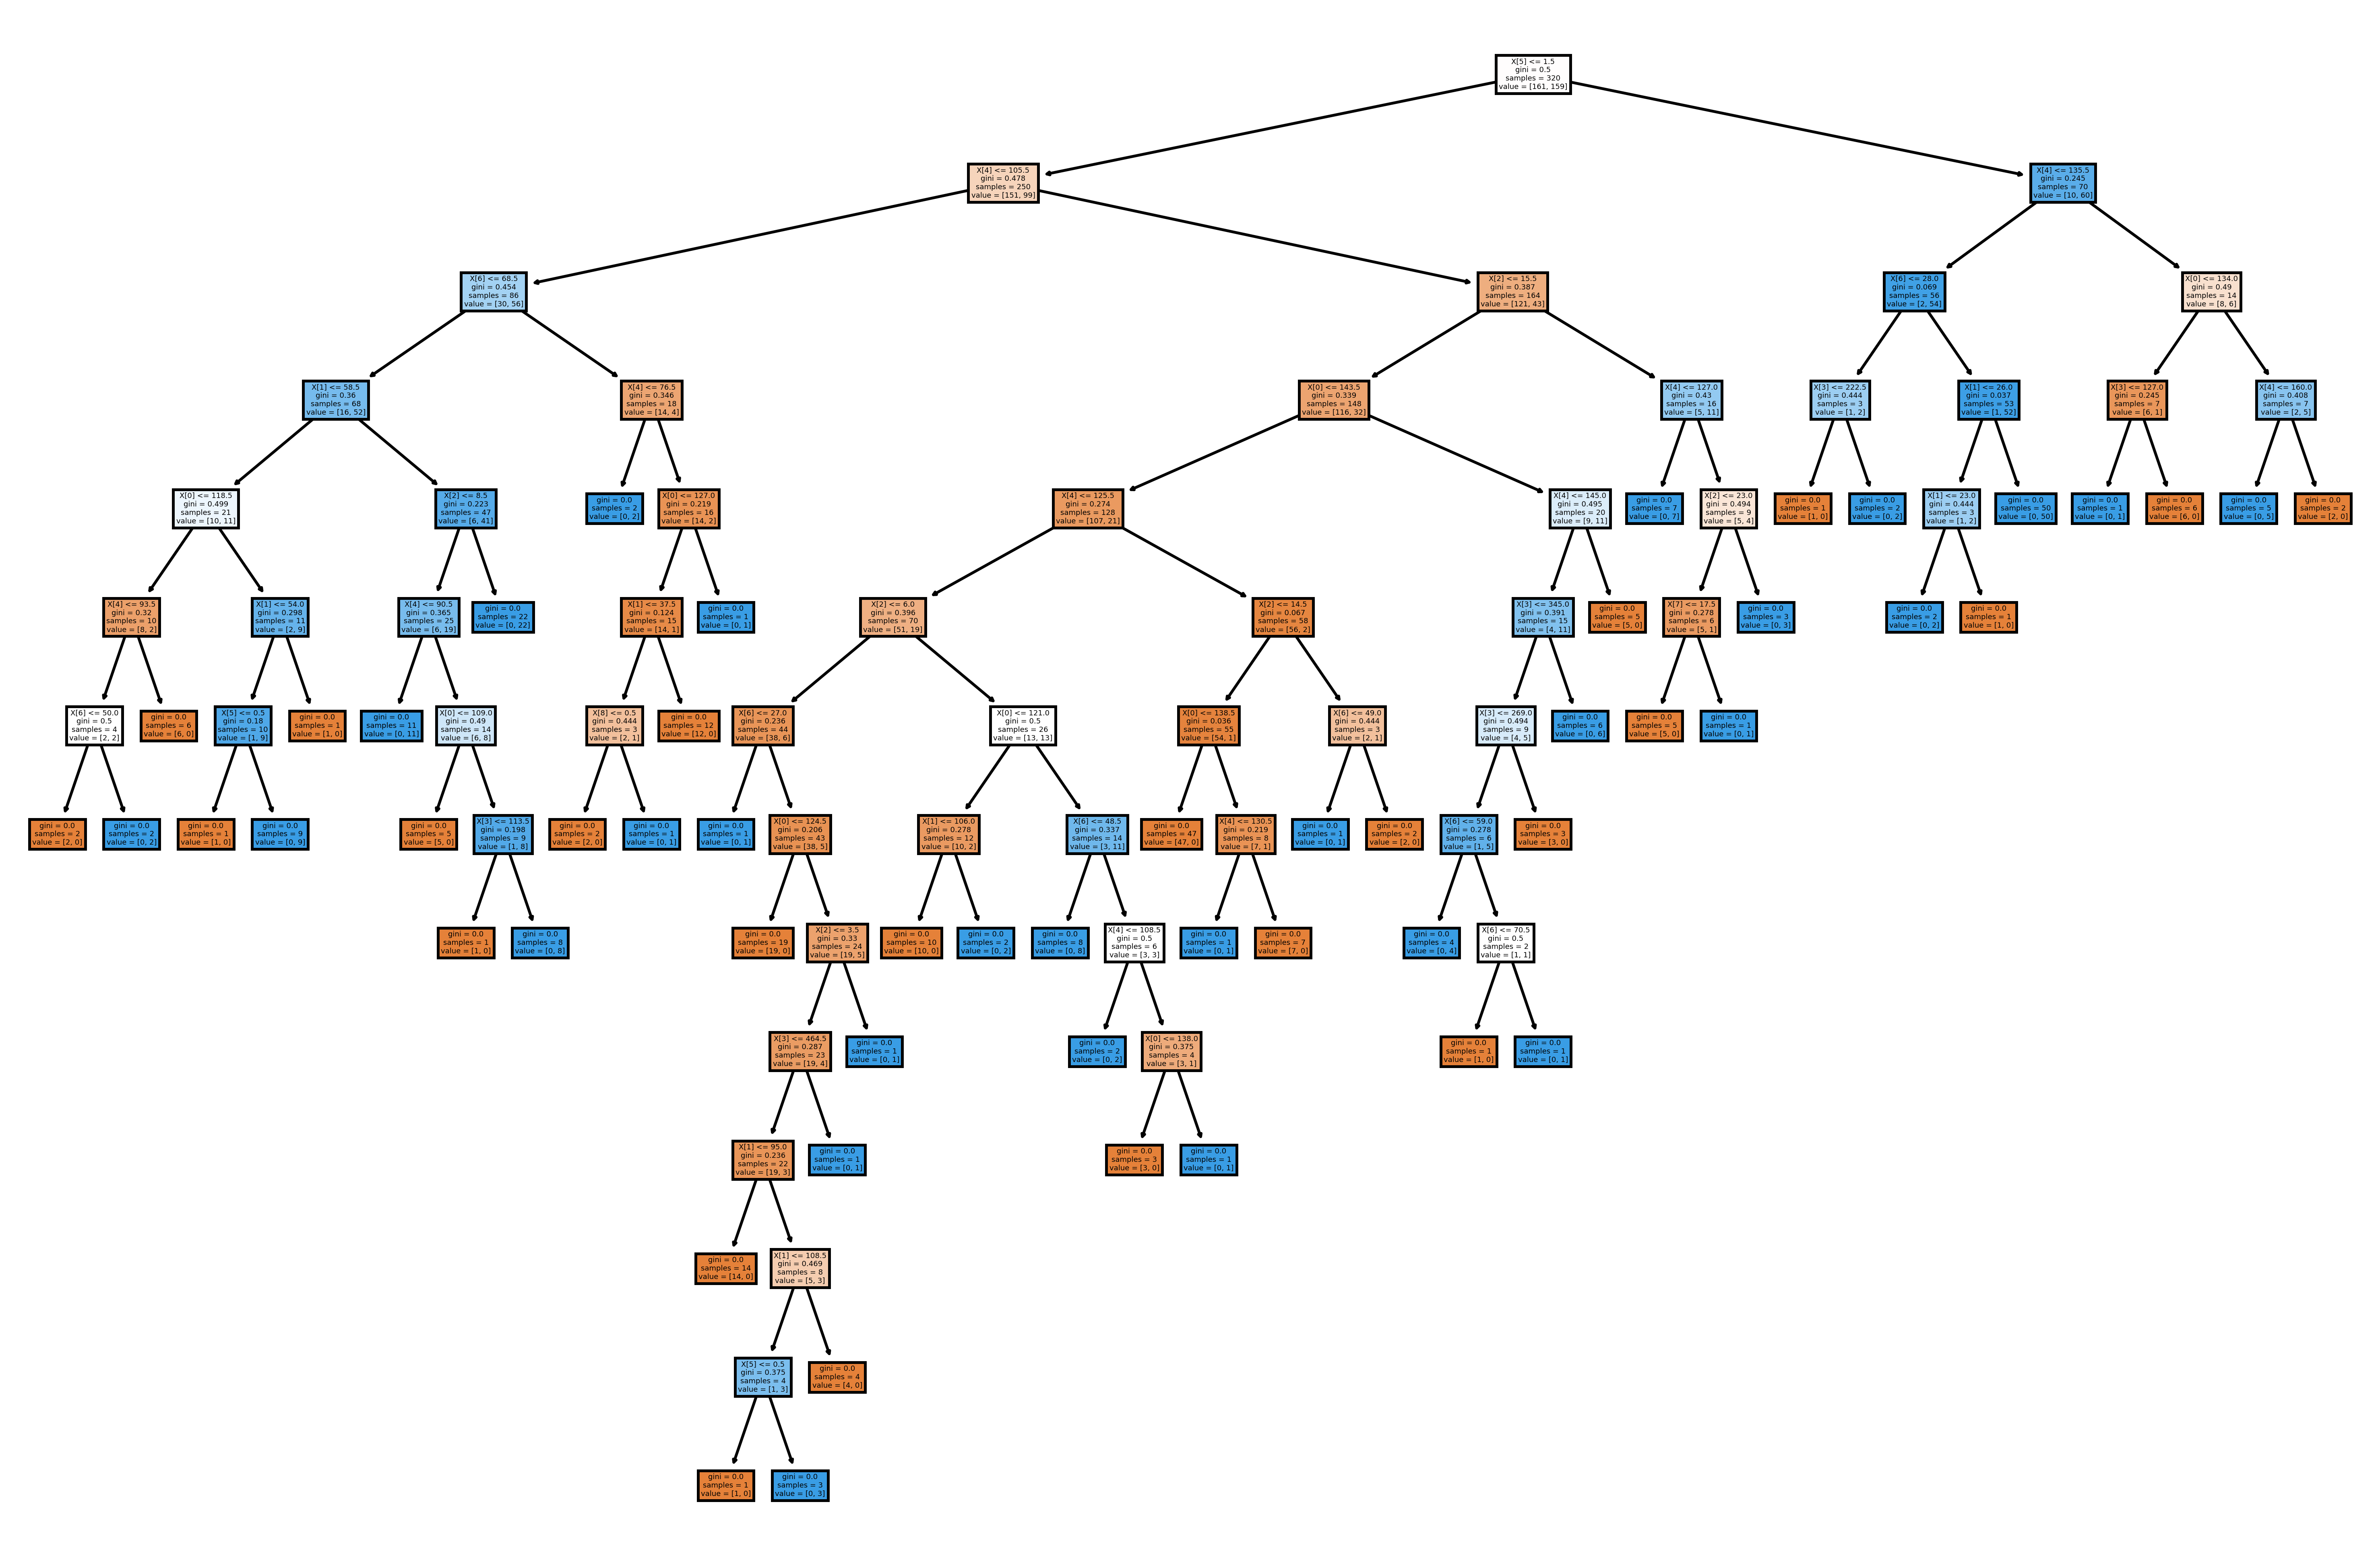

In [58]:
plt.figure(figsize=(15,10),dpi=500)
tree.plot_tree(model2,filled=True);

In [59]:
metrics.accuracy_score(Y_test,preds)

0.6625

In [60]:
path = model2.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [61]:
ccp_alphas

array([0.        , 0.00260417, 0.00291667, 0.00301339, 0.00301724,
       0.00460271, 0.0046875 , 0.00477008, 0.005     , 0.00510417,
       0.00511364, 0.00520833, 0.00535714, 0.00535714, 0.00555556,
       0.0065625 , 0.00803571, 0.00813802, 0.00850694, 0.0090524 ,
       0.01041667, 0.01176527, 0.01260417, 0.01337089, 0.01610246,
       0.02004393, 0.02008929, 0.02617799, 0.05334692, 0.07268404])

# For best value of Tree with less gini impurities and less size of tree

In [62]:
clfs = []
for ccp_alpha in ccp_alphas:
    model2 = DecisionTreeClassifier(criterion='gini', ccp_alpha=ccp_alpha)
    model2.fit(X_train, Y_train)
    clfs.append(model2)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))   

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07268404017857144


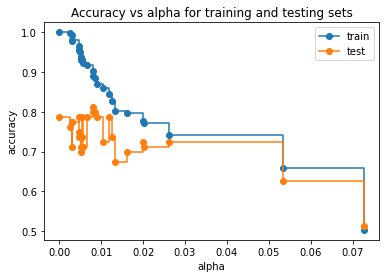

In [63]:
train_scores = [model2.score(X_train, Y_train) for model2 in clfs]
test_scores = [model2.score(X_test, Y_test) for model2 in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [64]:
model2 = DecisionTreeClassifier(criterion='gini',random_state=0,ccp_alpha=0.012)
model2.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.012, random_state=0)

In [65]:
pred2 = model2.predict(X_test)
pd.Series(pred2).value_counts()

1    42
0    38
dtype: int64

In [66]:
metrics.accuracy_score(Y_test,pred2)

0.7875

In [67]:
print(classification_report(Y_test,pred2))

              precision    recall  f1-score   support

           0       0.82      0.76      0.78        41
           1       0.76      0.82      0.79        39

    accuracy                           0.79        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.79      0.79      0.79        80



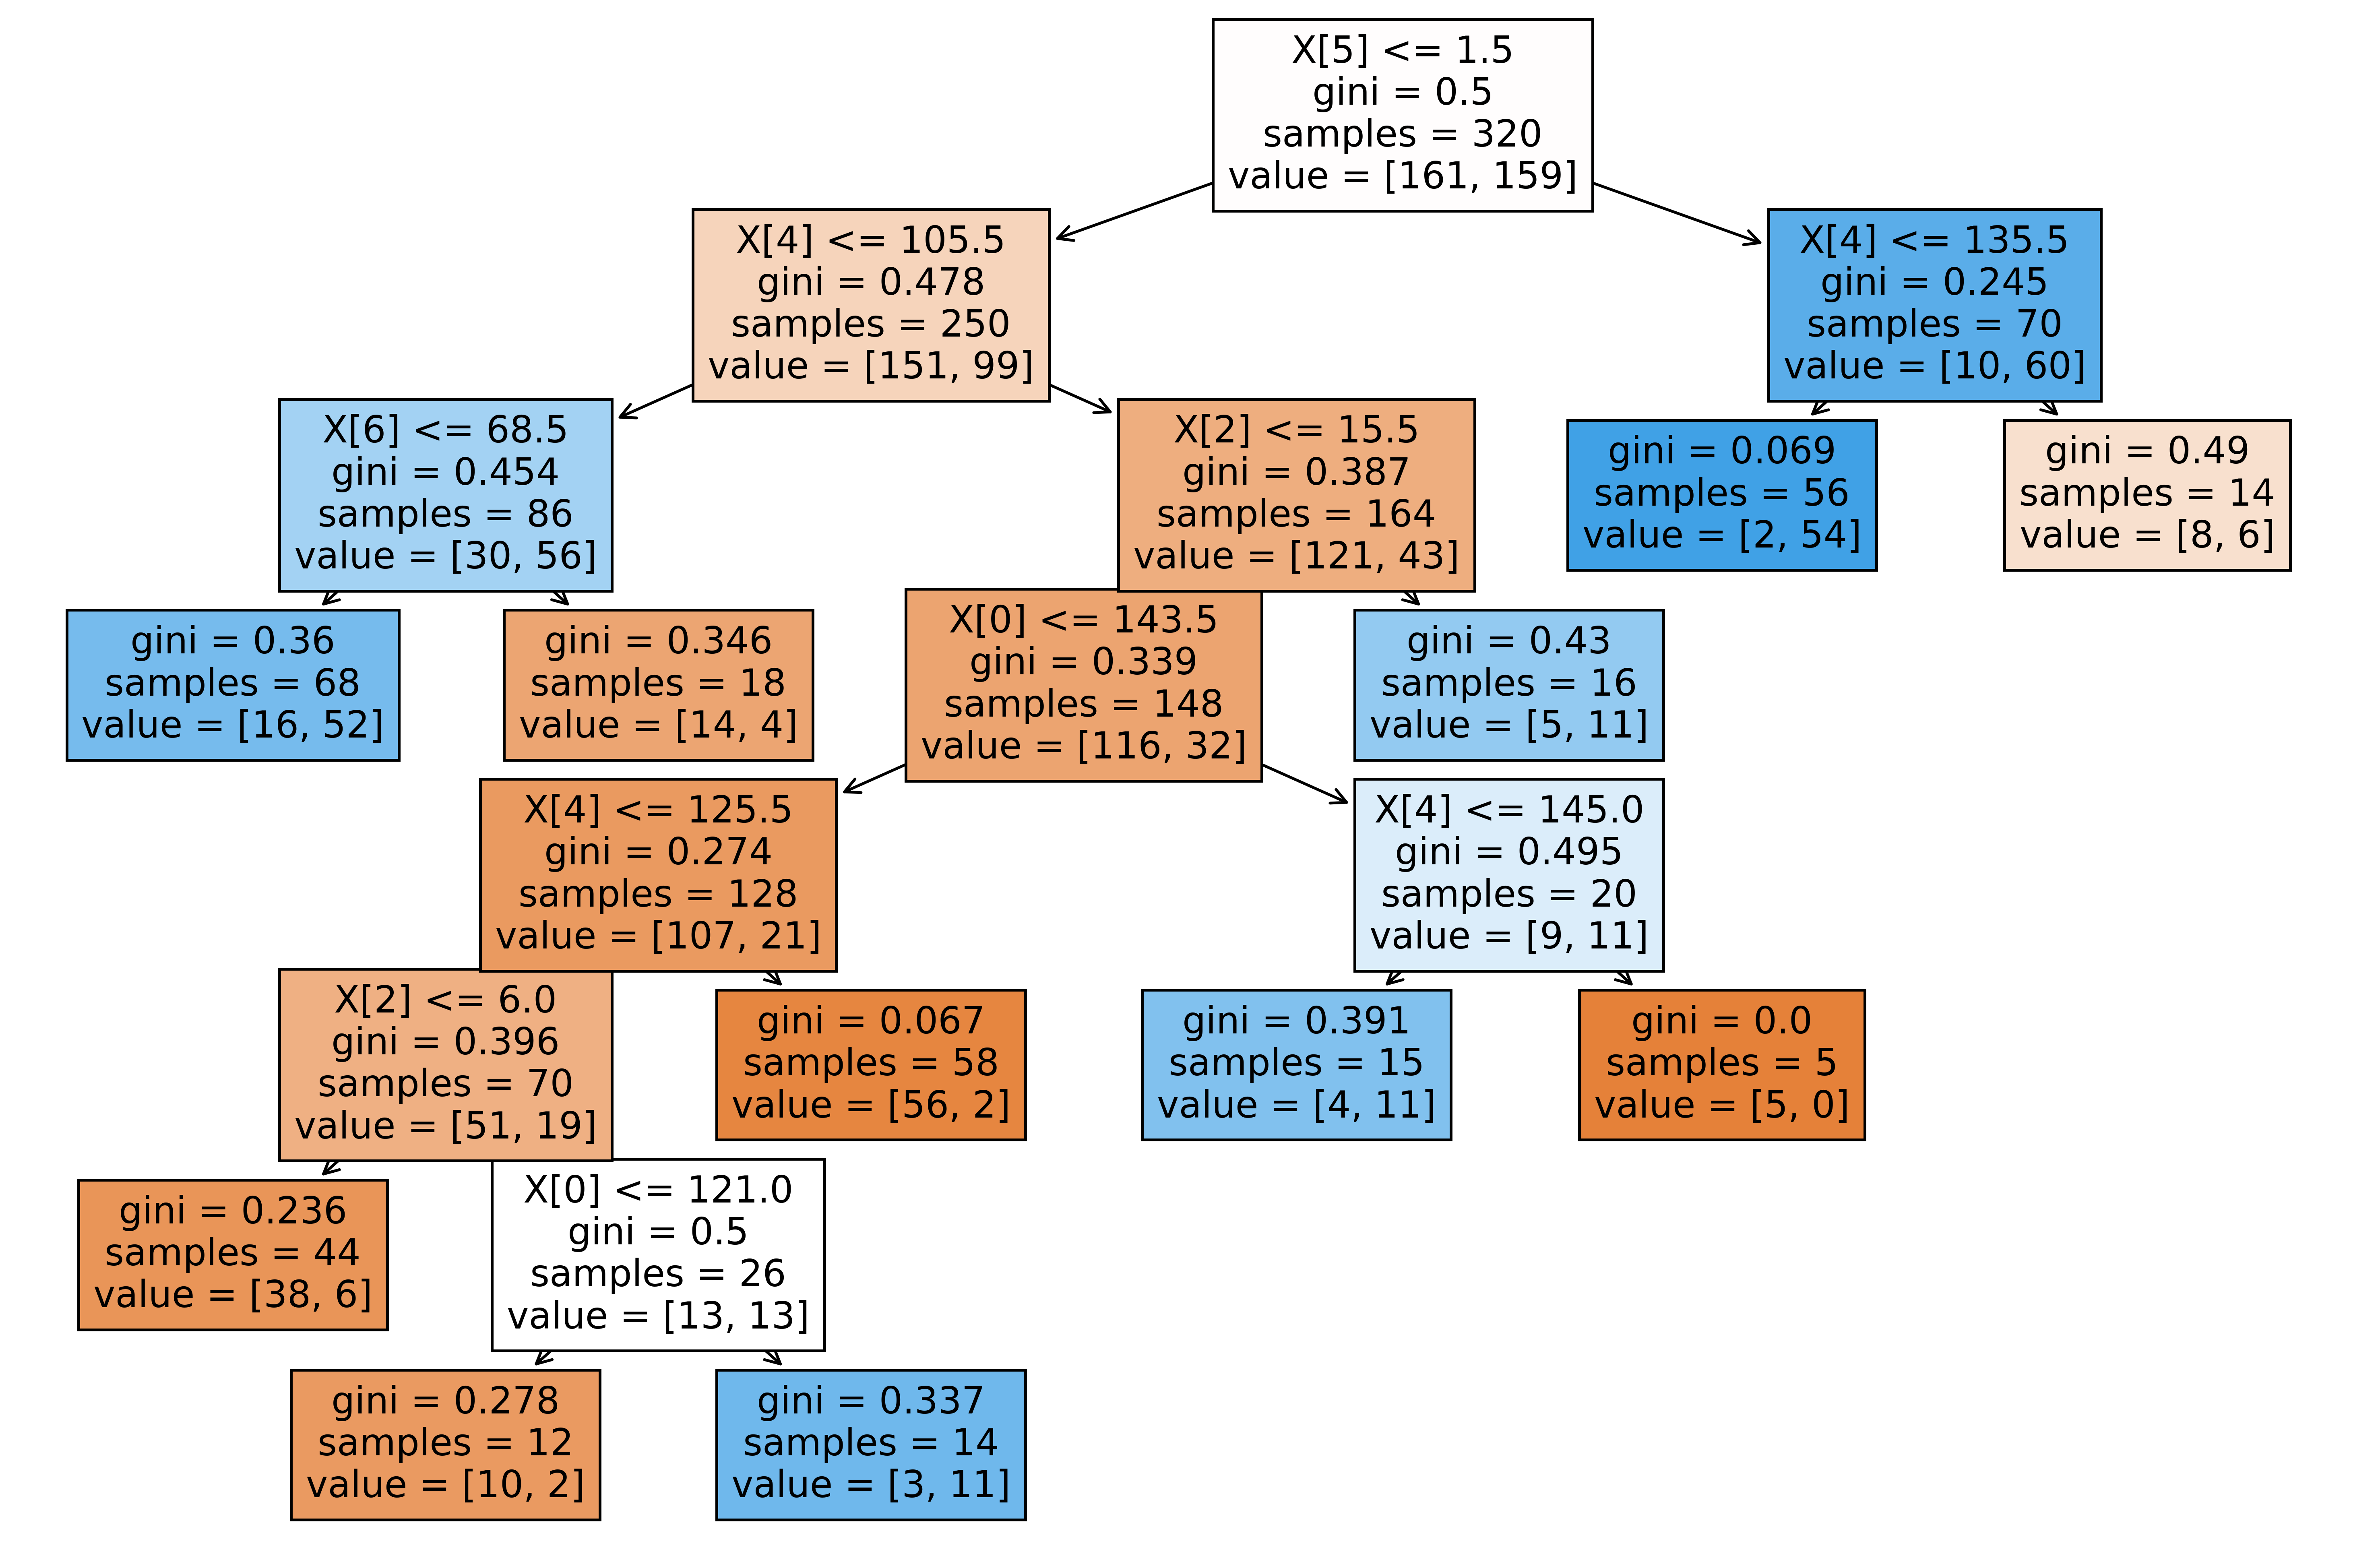

In [68]:
plt.figure(figsize=(15,10),dpi=500)
tree.plot_tree(model2,filled=True);

## Decision Tree using Pre-puning and method=Entropy

In [69]:
model3 = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model3.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

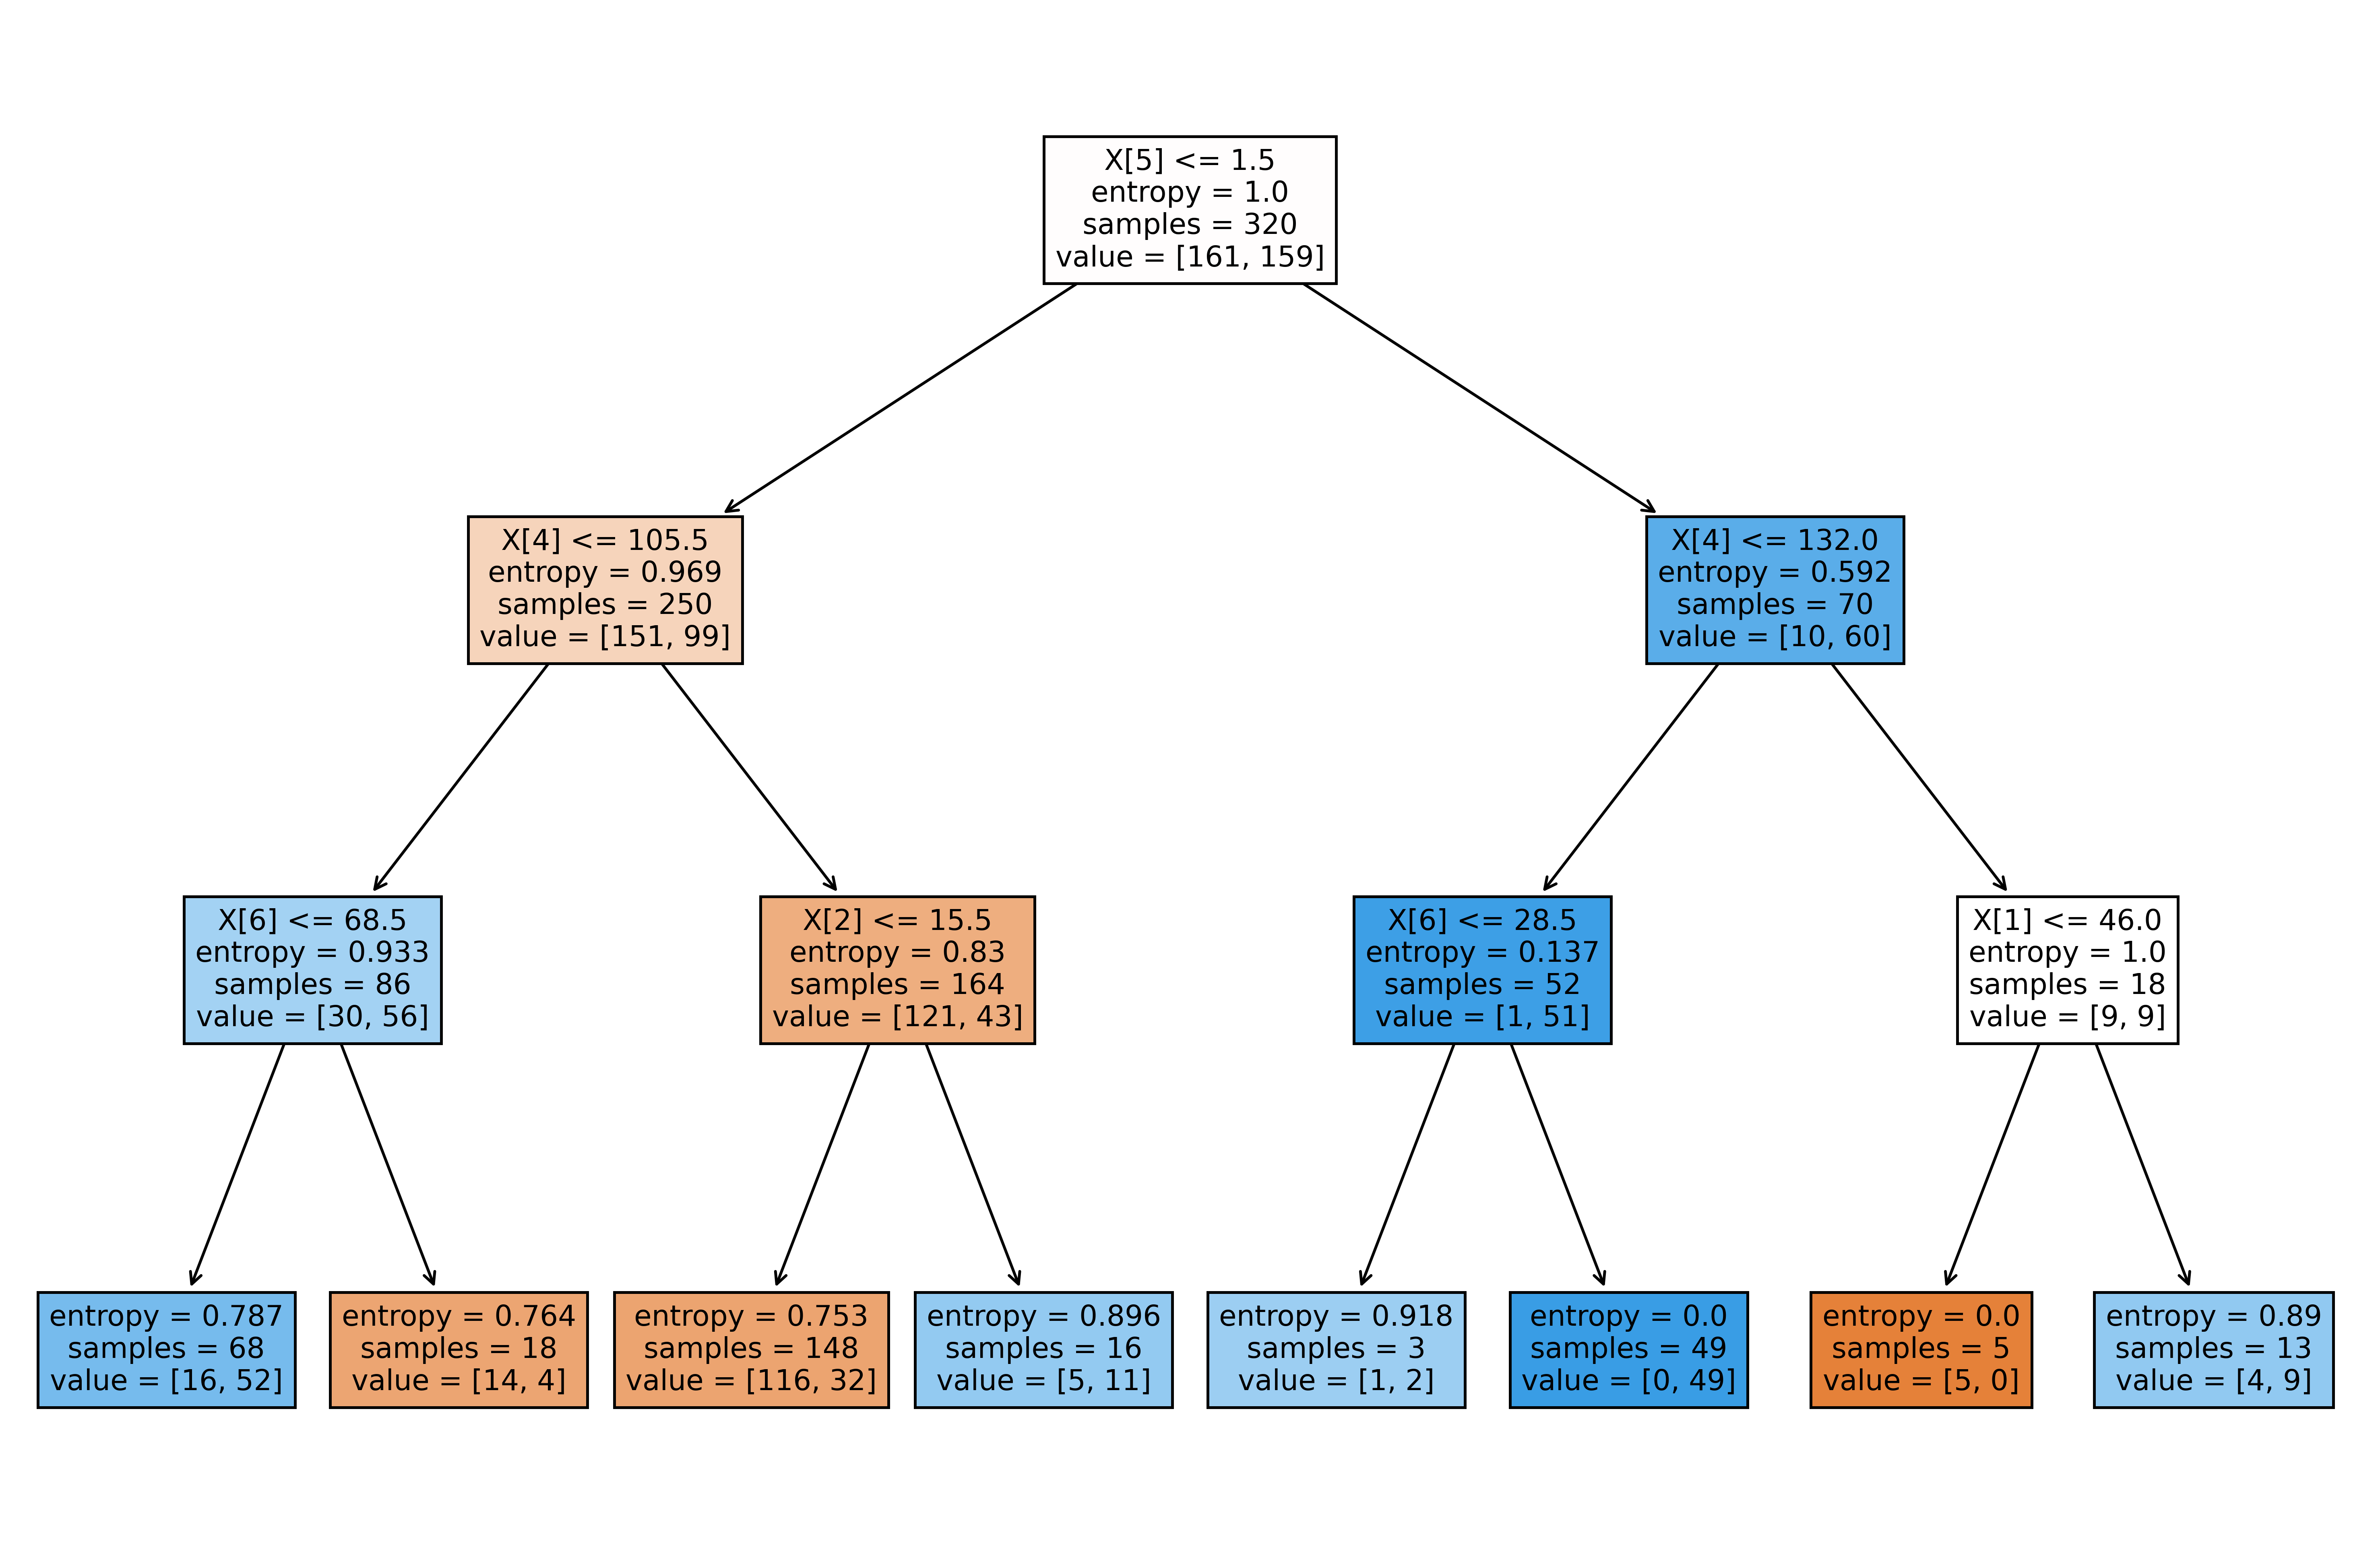

In [70]:
plt.figure(figsize=(15,10),dpi=500)
tree.plot_tree(model3,filled=True);

In [71]:
pred3 = model3.predict(X_test)
pd.Series(pred3).value_counts()

0    46
1    34
dtype: int64

In [72]:
metrics.accuracy_score(Y_test,pred3)

0.7125

In [73]:
print(classification_report(Y_test,pred3))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74        41
           1       0.74      0.64      0.68        39

    accuracy                           0.71        80
   macro avg       0.72      0.71      0.71        80
weighted avg       0.71      0.71      0.71        80



# Desicion Tree using post-puning and method=Entropy

In [74]:
model4= DecisionTreeClassifier(criterion='entropy',random_state=0)
model4.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

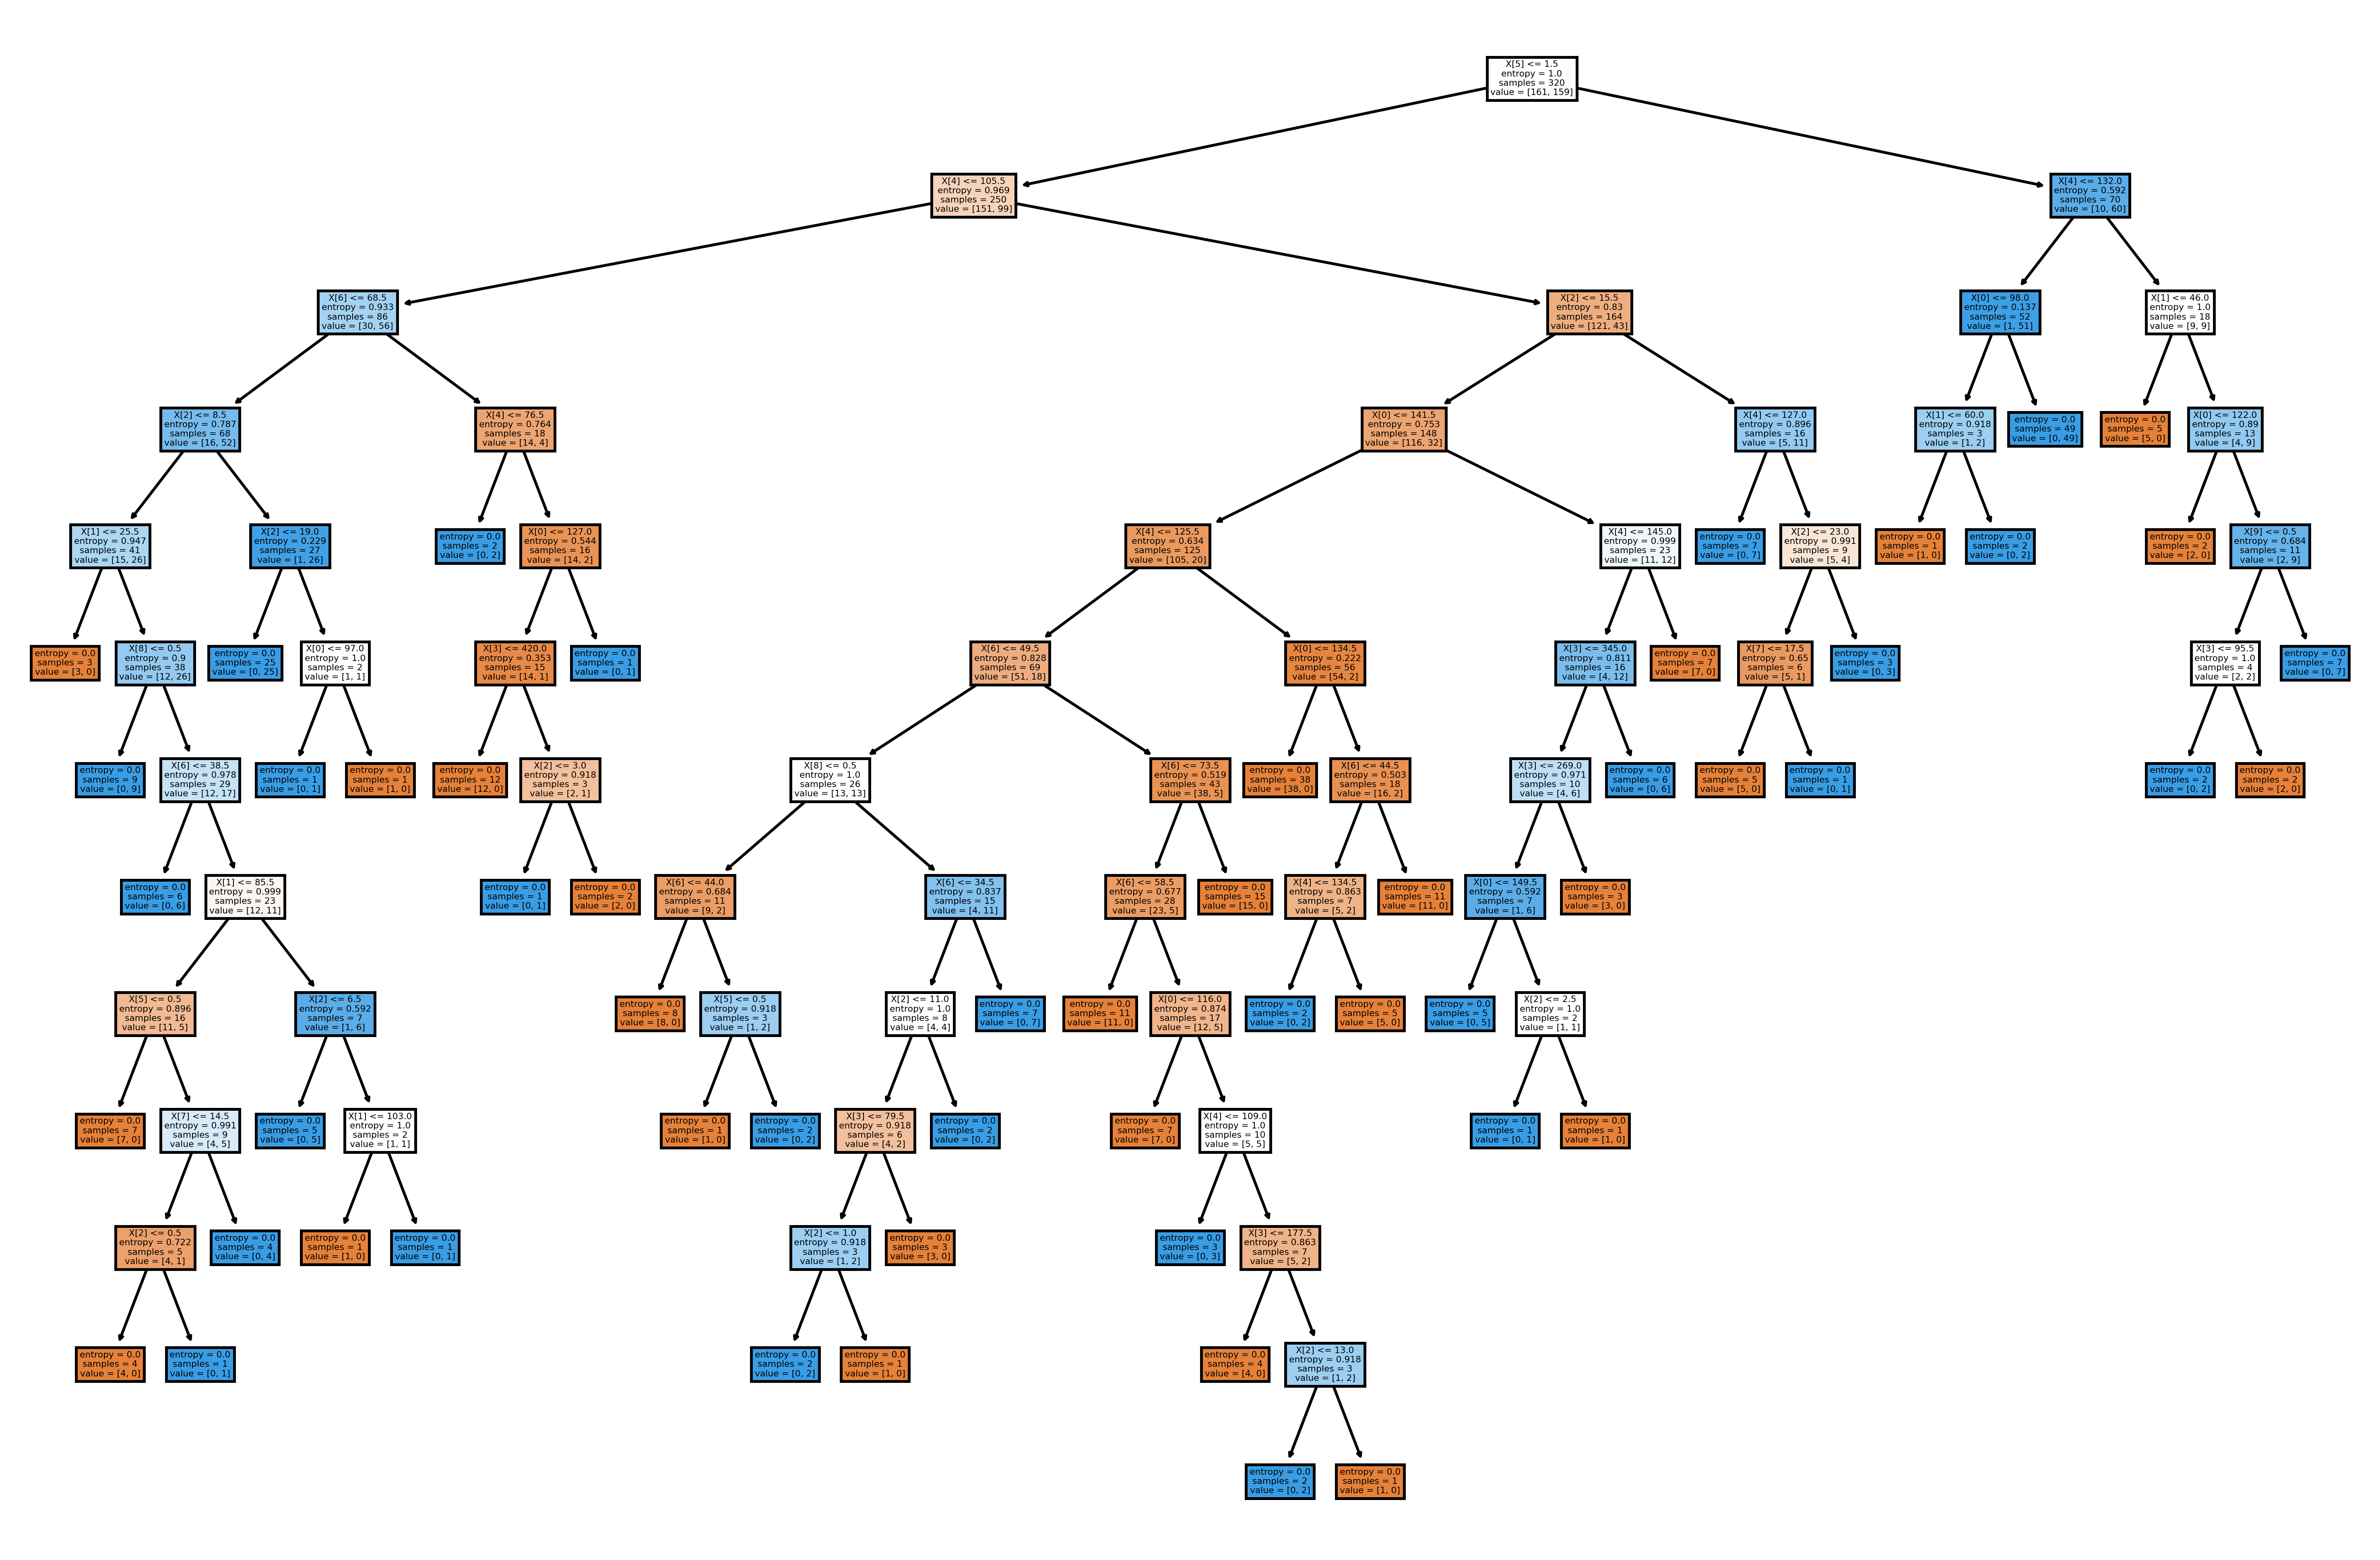

In [75]:
plt.figure(figsize=(15,10),dpi=500)
tree.plot_tree(model4,filled=True);

In [76]:
pred4=model4.predict(X_test)
pd.Series(pred4).value_counts()

0    40
1    40
dtype: int64

In [77]:
metrics.accuracy_score(Y_test,pred4)

0.7375

In [78]:
print(classification_report(Y_test,pred4))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74        41
           1       0.72      0.74      0.73        39

    accuracy                           0.74        80
   macro avg       0.74      0.74      0.74        80
weighted avg       0.74      0.74      0.74        80



In [79]:
path = model4.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [80]:
ccp_alphas

array([0.        , 0.00625   , 0.00625   , 0.00625   , 0.00669284,
       0.00669284, 0.00828186, 0.00833333, 0.00860902, 0.00860902,
       0.00860902, 0.01027174, 0.0106145 , 0.01128013, 0.01175691,
       0.01218792, 0.01236924, 0.0126624 , 0.01281094, 0.01296662,
       0.01303291, 0.01366964, 0.01381053, 0.01421753, 0.0149048 ,
       0.01568609, 0.01580828, 0.01585133, 0.01653772, 0.0169279 ,
       0.01851864, 0.02007378, 0.02659137, 0.02761671, 0.0301136 ,
       0.03223993, 0.04049965, 0.05089975, 0.08054307, 0.11385387])

## For best value of tree less Entropy and less tree size

In [81]:
clfs = []
for ccp_alpha in ccp_alphas:
    model4 = DecisionTreeClassifier(criterion='entropy', ccp_alpha=ccp_alpha)
    model4.fit(X_train, Y_train)
    clfs.append(model4)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))   

Number of nodes in the last tree is: 1 with ccp_alpha: 0.1138538701780425


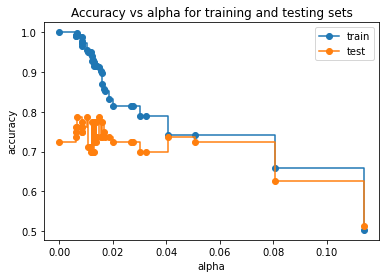

In [82]:
train_scores = [model4.score(X_train, Y_train) for model4 in clfs]
test_scores = [model4.score(X_test, Y_test) for model4 in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [83]:
model5 = DecisionTreeClassifier(criterion="entropy",ccp_alpha=0.023)
model5.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.023, criterion='entropy')

In [84]:
pred5=model5.predict(X_test)
pd.Series(pred5).value_counts()

0    43
1    37
dtype: int64

In [85]:
metrics.accuracy_score(Y_test,pred5)

0.725

In [86]:
print(classification_report(Y_test,pred5))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74        41
           1       0.73      0.69      0.71        39

    accuracy                           0.73        80
   macro avg       0.73      0.72      0.72        80
weighted avg       0.73      0.72      0.72        80



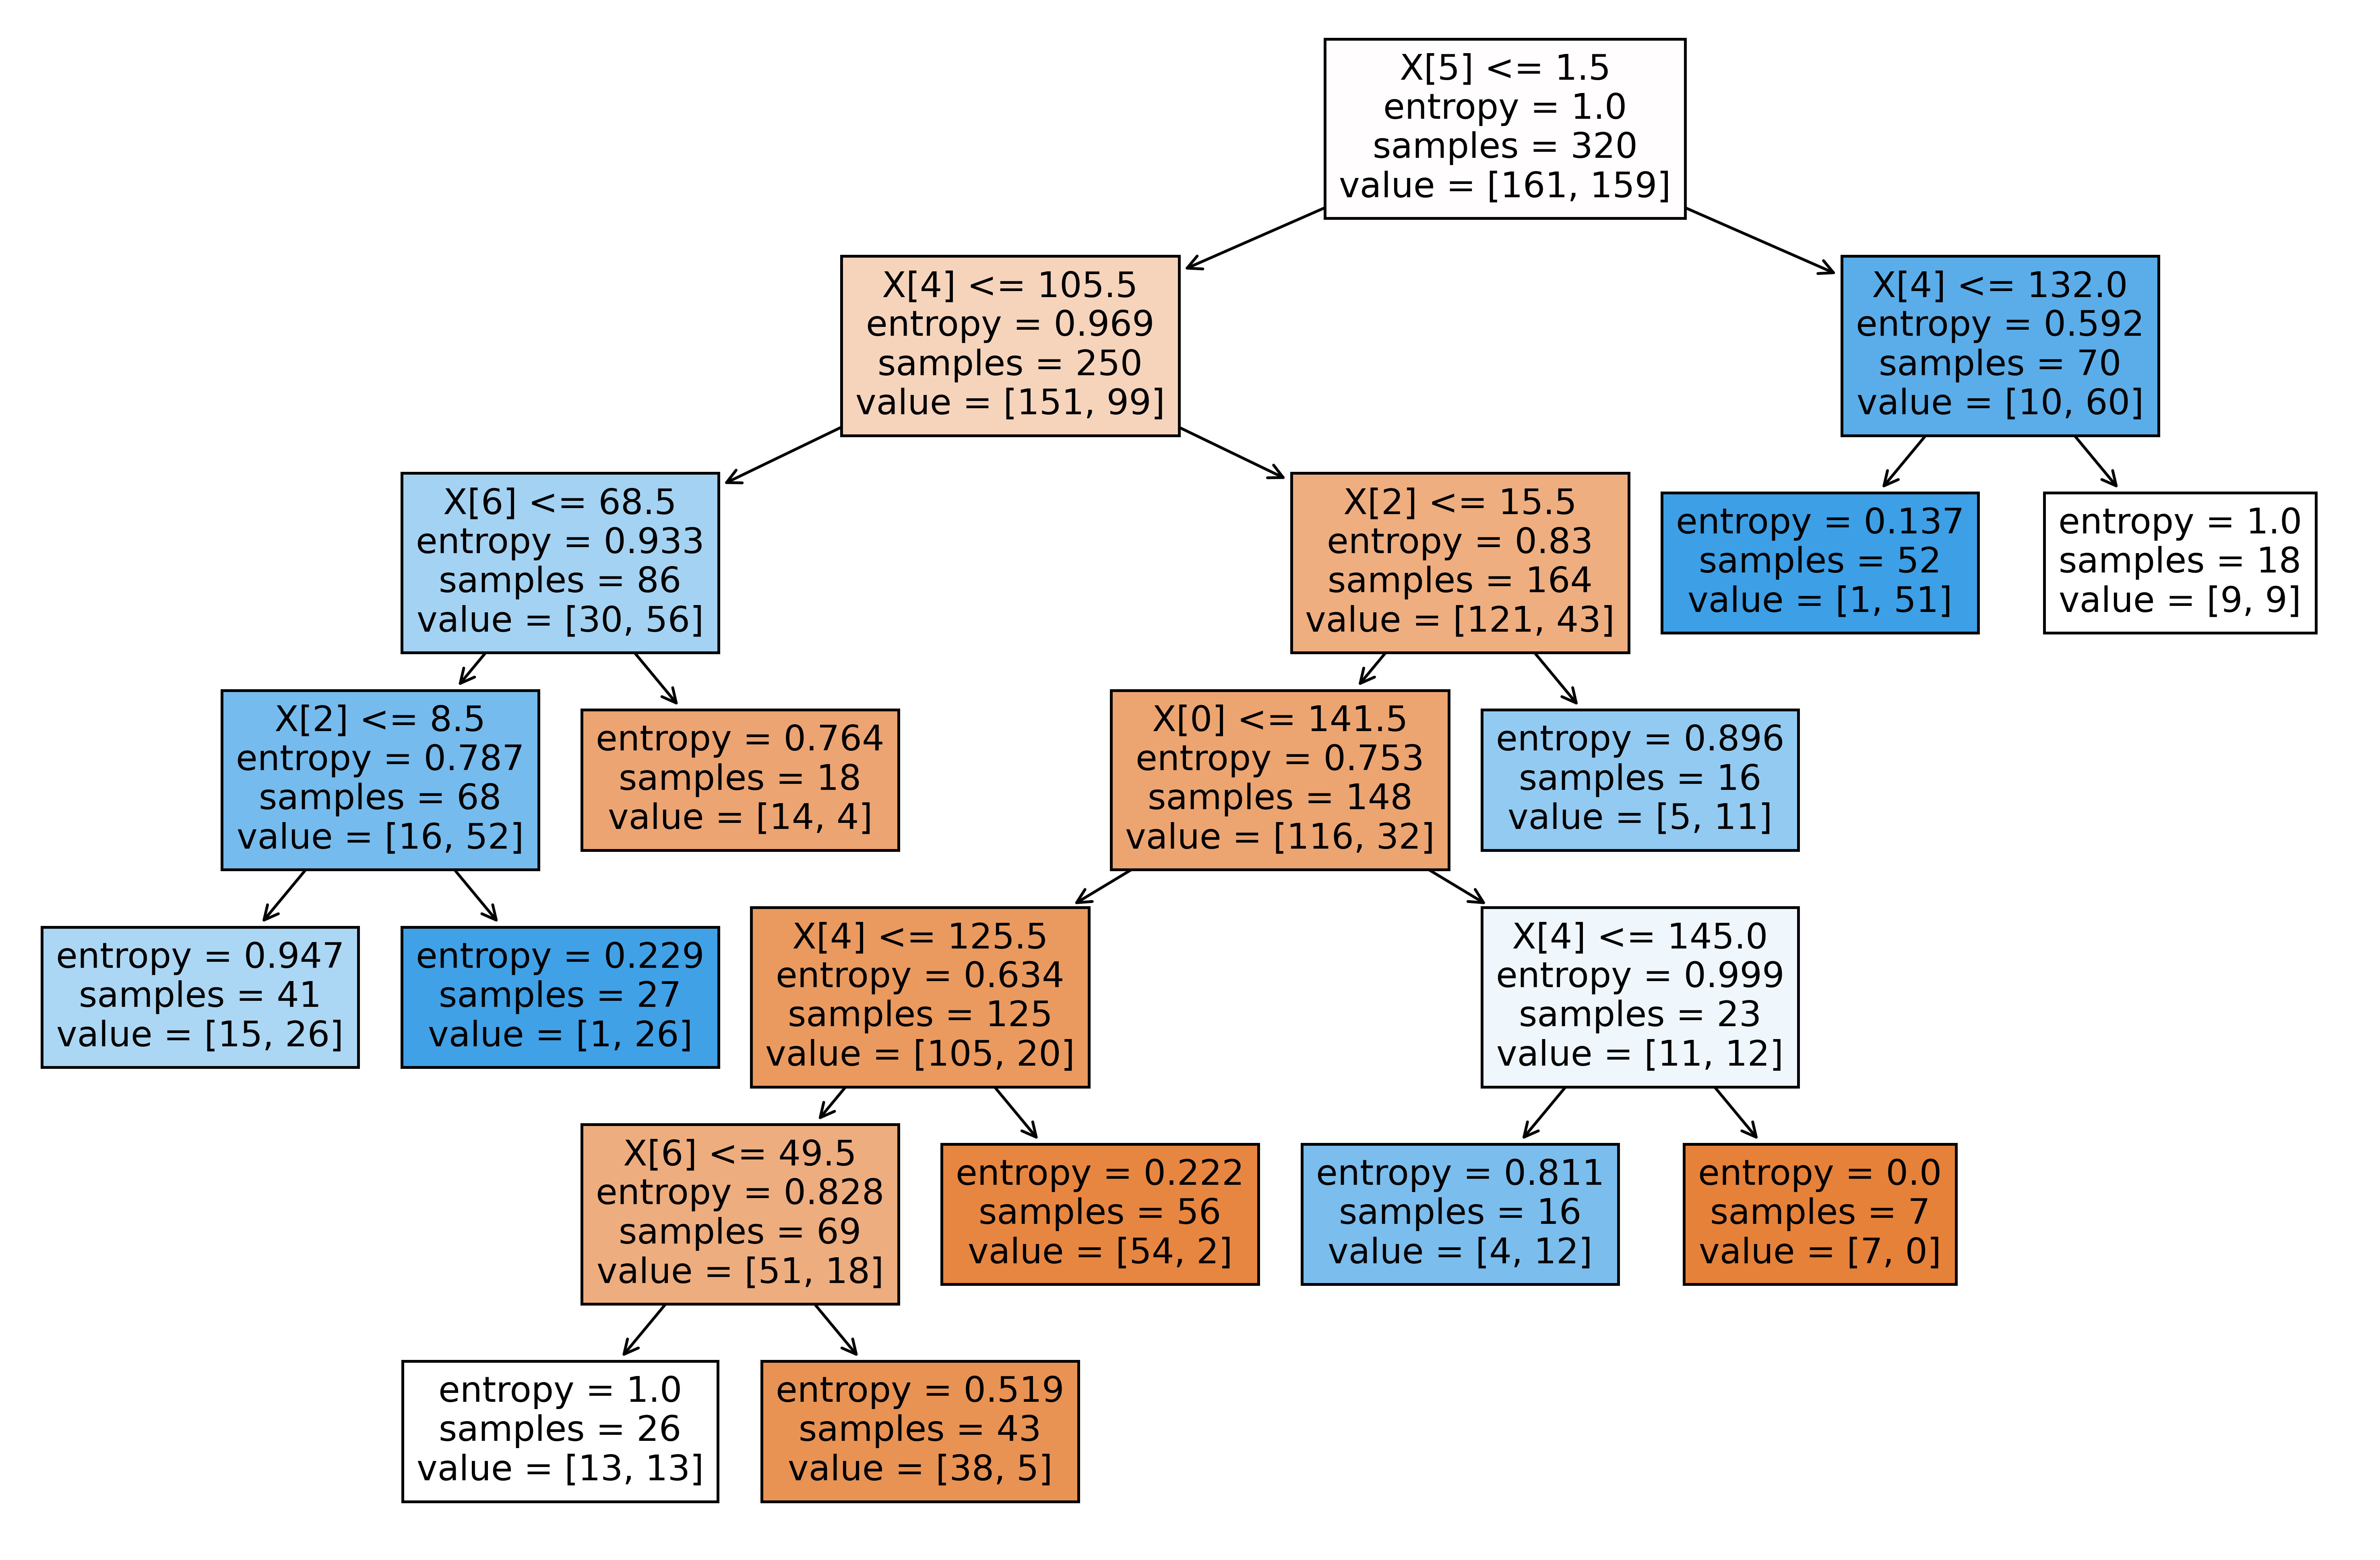

In [87]:
plt.figure(figsize=(15,10),dpi=500)
tree.plot_tree(model5,filled=True);

# Bagging

In [88]:
from sklearn.ensemble import BaggingClassifier


In [89]:
bg=BaggingClassifier()

In [90]:
k_fold = KFold(n_splits=10)
Cart = DecisionTreeClassifier()
num_trees=100
bagging = BaggingClassifier(base_estimator=Cart,max_samples=0.8,n_estimators=num_trees,random_state=45)
results = cross_val_score(bagging,X,Y,cv=k_fold)
print(results.mean())

0.8275


In [91]:
bg.fit(X_train,Y_train)

BaggingClassifier()

In [92]:
predict1 = bg.predict(X_test)
pd.Series(predict1).value_counts()

0    43
1    37
dtype: int64

In [93]:
metrics.accuracy_score(Y_test,predict1)

0.75

In [94]:
cm1 = confusion_matrix(Y_test,predict1)
cm1

array([[32,  9],
       [11, 28]], dtype=int64)

Text(33.0, 0.5, 'Truth')

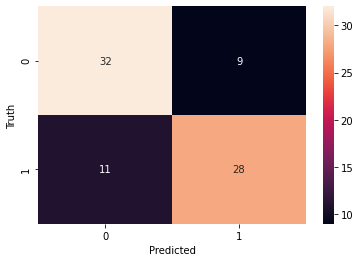

In [95]:
sns.heatmap(cm1,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [96]:
print(classification_report(Y_test,predict1))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76        41
           1       0.76      0.72      0.74        39

    accuracy                           0.75        80
   macro avg       0.75      0.75      0.75        80
weighted avg       0.75      0.75      0.75        80



# Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
k_fold = KFold(n_splits=10)
Cart = DecisionTreeClassifier()
num_trees=100
max_features = 3
random_forest = RandomForestClassifier(max_samples=0.8,n_estimators=num_trees,oob_score=True,max_features=max_features,random_state=45)
results = cross_val_score(random_forest,X,Y,cv=k_fold)
print(results.mean())

0.8175000000000001


In [99]:
rf = RandomForestClassifier()

In [100]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [101]:
predict2=rf.predict(X_test)
pd.Series(predict2).value_counts()

0    44
1    36
dtype: int64

In [102]:
metrics.accuracy_score(Y_test,predict2)

0.8125

In [103]:
cm2= confusion_matrix(Y_test,predict2)
cm2

array([[35,  6],
       [ 9, 30]], dtype=int64)

Text(33.0, 0.5, 'Truth')

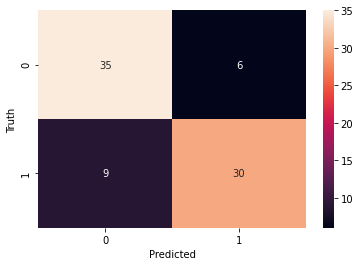

In [104]:
sns.heatmap(cm2,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [105]:
print(classification_report(Y_test,predict2))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        41
           1       0.83      0.77      0.80        39

    accuracy                           0.81        80
   macro avg       0.81      0.81      0.81        80
weighted avg       0.81      0.81      0.81        80



# AdaBoost

In [106]:
from sklearn.ensemble import AdaBoostClassifier

In [107]:
k_fold = KFold(n_splits=10)
Cart = DecisionTreeClassifier()
num_trees=10
seeds = 342
ada_boost = AdaBoostClassifier(n_estimators=num_trees,learning_rate=0.8,random_state=seeds)
results = cross_val_score(ada_boost,X,Y,cv=k_fold)
print(results.mean())

0.785


In [108]:
ad = AdaBoostClassifier()

In [109]:
ad.fit(X_train,Y_train)

AdaBoostClassifier()

In [110]:
predict3=ad.predict(X_test)
pd.Series(predict3).value_counts()

1    44
0    36
dtype: int64

In [111]:
metrics.accuracy_score(Y_test,predict3)

0.8125

In [112]:
cm3= confusion_matrix(Y_test,predict3)
cm3

array([[31, 10],
       [ 5, 34]], dtype=int64)

Text(33.0, 0.5, 'Truth')

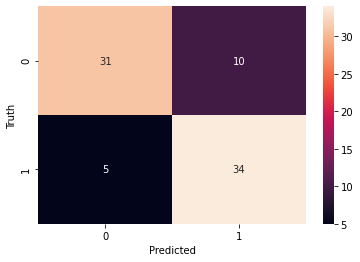

In [113]:
sns.heatmap(cm3,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [114]:
print(classification_report(Y_test,predict3))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        41
           1       0.77      0.87      0.82        39

    accuracy                           0.81        80
   macro avg       0.82      0.81      0.81        80
weighted avg       0.82      0.81      0.81        80

